#  **E-Commerce Shipping Data Python Exercise**

# Import Library & Read Dataset

In [83]:
#Import Library
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import statsmodels.stats.proportion as sp
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc

In [84]:
#Visualization plot settings
sns.set(rc={'figure.figsize':(10,5)})
sns.set_style('whitegrid')
sns.color_palette('viridis')
plt.style.use('seaborn-bright')

In [85]:
#read dataset
df = pd.read_csv('Train.csv')
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


# Exploratory Data Analysis

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


| Variable | Type | Definition | Example |
| ----------- | ----------- | ----------- | ----------- |
| ID | Nominal | ID Number of Customers | 10995, 10996, etc. Has no calculation meaning
| Warehouse_block | Nominal | Warehouse where goods are being processed for deliveries  | A, B, C, D, F
| Mode_of_Shipment | Nominal | Transportation that used for deliveries. | Flight, Road, Ship
| Customer_care_calls | Discrete | The number of calls made from enquiry for enquiry of the shipment. | 1, 2, 5, etc.
| Customer_rating | Ordinal | Rating that given from the customer to the company | 1 is the lowest (Worst), 5 is the highest (Best) best - better - neutral - bad - worst
| Cost_of_the_Product | Discrete | Price in USD | 177, 216
| Prior_purchases | Discrete | Recent trx made by the customer | 3, 2, 6
| Product_importance | Ordinal | Importance level of the goods | Low, Medium, High
| Gender | Nominal | Gender | Male, Female
| Discount_offered | Discrete | Discount that has given for specific products | 65, 10, 16
| Weight_in_gms | Continous | Weight of the goods in grams | 4953
| Reached.on.Time_Y.N | Nominal | Target Variable,1= NOT reached on time, 0 = REACHED on time | 1, 0

In [87]:
df.sample(10)

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
1475,1476,F,Ship,4,3,271,3,low,M,59,2996,1
6052,6053,C,Ship,7,2,302,5,medium,M,5,1614,0
2720,2721,A,Road,4,3,210,3,low,M,3,2742,1
2437,2438,F,Ship,4,5,206,3,low,F,65,2598,1
1572,1573,D,Ship,2,1,252,3,low,F,12,2800,1
2315,2316,F,Road,4,5,135,2,high,F,22,1195,1
2728,2729,C,Road,4,4,179,3,low,M,48,1943,1
10680,10681,D,Road,5,3,132,3,low,M,7,4462,1
871,872,F,Ship,4,2,208,3,high,M,17,2777,1
8757,8758,B,Road,5,3,197,5,low,F,1,5581,0


In [88]:
#change column name
df.rename(columns={'ID' : 'ID', 'Warehouse_block' : 'Warehouse', 'Mode_of_Shipment' : 'Shipment', 
                   'Customer_care_calls' : 'Calls', 'Customer_rating' : 'Rating', 'Cost_of_the_Product' : 'Cost', 
                   'Prior_purchases' : 'Purchase', 'Product_importance' : 'Importance', 'Gender' : 'Gender', 
                   'Discount_offered' : 'Discount', 'Weight_in_gms' : 'Weight', 'Reached.on.Time_Y.N' : 'Late'}, inplace = True)

In [89]:
df.head()

,ID,Warehouse,Shipment,Calls,Rating,Cost,Purchase,Importance,Gender,Discount,Weight,Late
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


## Numerical Approach

In [90]:
#Changing Data Type
df = df.astype({'ID' : object, 'Rating' : object, 'Late' : object})

In [91]:
#Dividing Column name based on data type for easier descriptive analysis
cats = ['ID', 'Warehouse', 'Shipment', 'Rating', 'Importance', 'Gender', 'Late']
nums = ['Calls', 'Cost', 'Purchase', 'Discount', 'Weight', ]

In [92]:
df[cats].describe()

,ID,Warehouse,Shipment,Rating,Importance,Gender,Late
count,10999,10999,10999,10999,10999,10999,10999
unique,10999,5,3,5,3,2,2
top,1,F,Ship,3,low,F,1
freq,1,3666,7462,2239,5297,5545,6563


In [93]:
df[nums].describe()

,Calls,Cost,Purchase,Discount,Weight
count,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,4.054459,210.196836,3.567597,13.373216,3634.016729
std,1.141490,48.063272,1.522860,16.205527,1635.377251
min,2.000000,96.000000,2.000000,1.000000,1001.000000
25%,3.000000,169.000000,3.000000,4.000000,1839.500000
50%,4.000000,214.000000,3.000000,7.000000,4149.000000
75%,5.000000,251.000000,4.000000,10.000000,5050.000000
max,7.000000,310.000000,10.000000,65.000000,7846.000000


In [94]:
df['Late'].value_counts()

1    6563
0    4436
Name: Late, dtype: int64

In [95]:
df = df.astype({'ID' : 'int64', 'Rating' : 'int64', 'Late' : 'int64'})

In [96]:
#Dividing Data Type for easier Visualization
cats = ['Warehouse', 'Shipment', 'Importance', 'Gender']
nums = ['Calls', 'Rating', 'Cost', 'Purchase', 'Discount', 'Weight', 'Late']

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          10999 non-null  int64 
 1   Warehouse   10999 non-null  object
 2   Shipment    10999 non-null  object
 3   Calls       10999 non-null  int64 
 4   Rating      10999 non-null  int64 
 5   Cost        10999 non-null  int64 
 6   Purchase    10999 non-null  int64 
 7   Importance  10999 non-null  object
 8   Gender      10999 non-null  object
 9   Discount    10999 non-null  int64 
 10  Weight      10999 non-null  int64 
 11  Late        10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


### Univariate Analysis

#### Boxplot

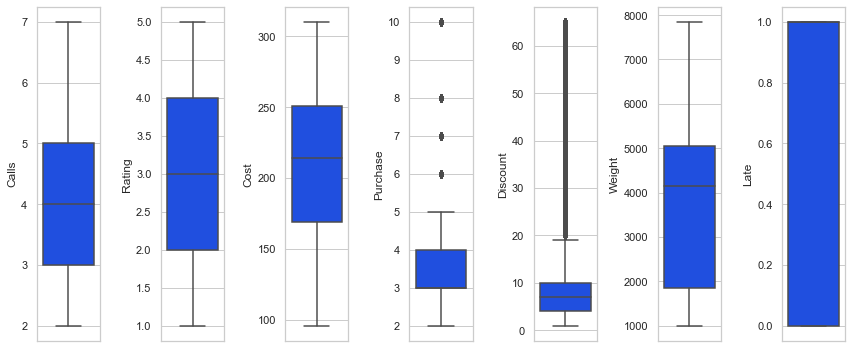

In [98]:
plt.figure(figsize=(12, 5))
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.boxplot(y=df[nums[i]], orient='v')
    plt.tight_layout()

#### Distplot

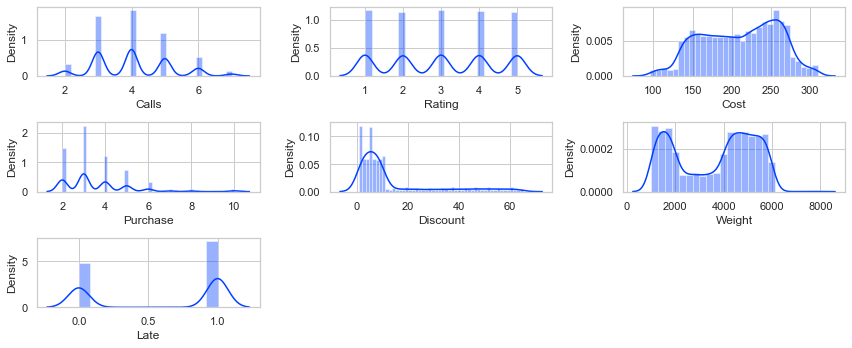

In [99]:
plt.figure(figsize=(12, 5))
for i in range(0, len(nums)):
    plt.subplot(3, len(nums)/2, i+1)
    sns.distplot(df[nums[i]])
    plt.tight_layout()

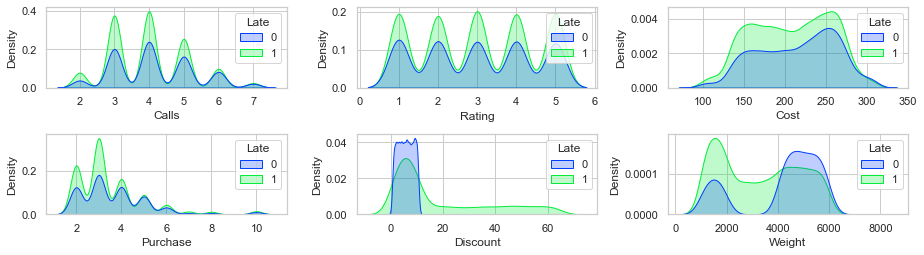

In [100]:
#Data Distribution View to the target
numsplot = ['Calls','Rating', 'Cost','Purchase', 'Discount', 'Weight']
plt.figure(figsize=(13, 5))
for i in range(0, len(numsplot)):
    plt.subplot(3, len(numsplot)/2, i+1)
    sns.kdeplot(data=df, x=df[numsplot[i]], hue='Late', fill='True')
    plt.tight_layout()

#### Violinplot

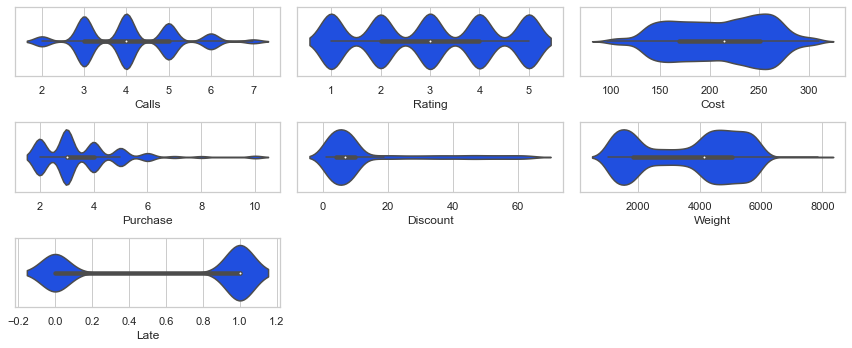

In [101]:
plt.figure(figsize=(12, 5))
for i in range(0, len(nums)):
    plt.subplot(3, len(nums)/2, i+1)
    sns.violinplot(df[nums[i]])
    plt.tight_layout()

#### Countplot

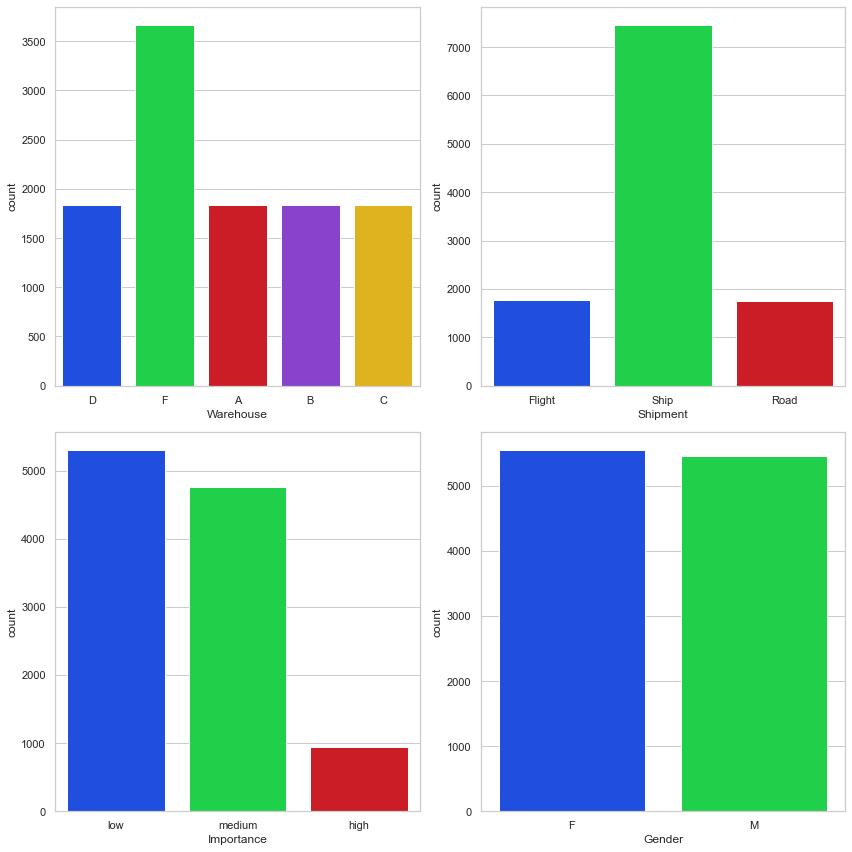

In [102]:
plt.figure(figsize=(12, 12))
for i in range(0, len(cats)):
    plt.subplot(2, 2, i+1)
    sns.countplot(df[cats[i]], orient='v')
    plt.tight_layout()

<AxesSubplot:xlabel='Late', ylabel='count'>

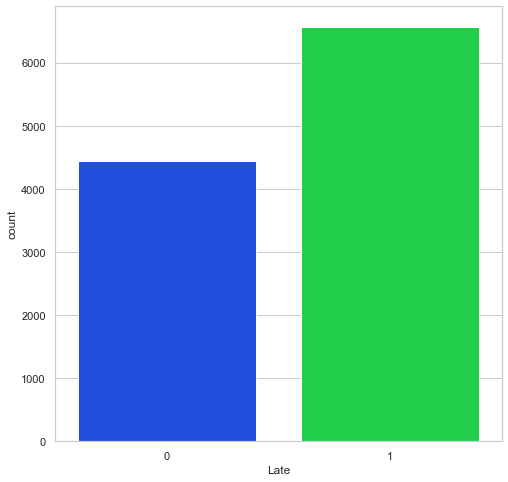

In [103]:
plt.figure(figsize=(8, 8))
sns.countplot(x=df['Late'], data=df)

### Multivariate Analysis

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          10999 non-null  int64 
 1   Warehouse   10999 non-null  object
 2   Shipment    10999 non-null  object
 3   Calls       10999 non-null  int64 
 4   Rating      10999 non-null  int64 
 5   Cost        10999 non-null  int64 
 6   Purchase    10999 non-null  int64 
 7   Importance  10999 non-null  object
 8   Gender      10999 non-null  object
 9   Discount    10999 non-null  int64 
 10  Weight      10999 non-null  int64 
 11  Late        10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


#### Histplot

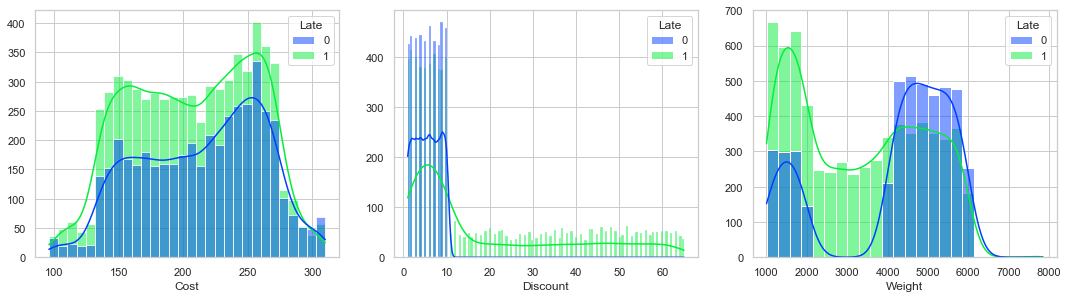

In [105]:
flag2 = ['Cost', 'Discount', 'Weight']

plt.figure(figsize=(15, 12))
for i in range(0, len(flag2)):
    plt.subplot(len(flag2), 3, i+1)
    sns.histplot(data=df, x=df[flag2[i]], hue=df['Late'], fill=True, kde='True')
    plt.tight_layout()
    plt.ylabel(None)

1.  Based on the Cost Histogram, late deliveries increases when cost is close to 130 Dollar and decreases when price is close to 275 Dollar.

2.  Based on the Discount Histogram, all deliveries is late  when discount is below 10 Dollar Discount, and there is more on-time deliveries than late deliveries when discount is less than 10 Dollar.

3.  Based on Weight Histogram, the information acquired is :<br>
   a.   More late deliveries occured when weight s below 2000 gram.<br>
   b.   If the weight is between 2000 grams to 4000 gram, the deliveries must be late.<br>
   c.   There is more on time deliveries when the weight is 4000 gram to 6000 gram.<br>


#### Boxplot

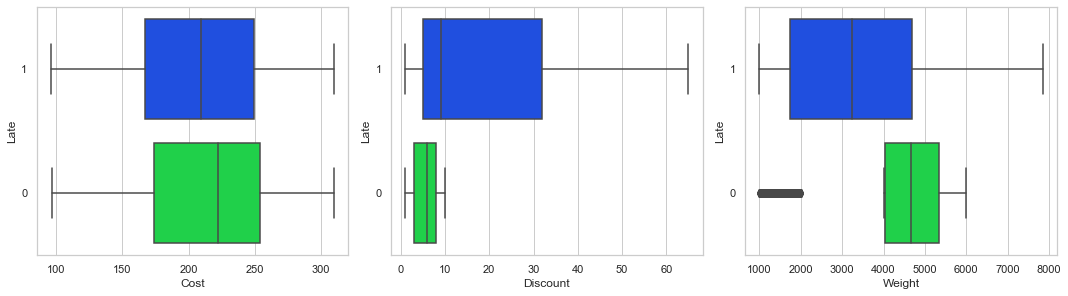

In [106]:
plt.figure(figsize=(15, 12))
for i in range(0, len(flag2)):
    plt.subplot(len(flag2), 3, i+1)
    sns.boxplot(data=df, x=df[flag2[i]], y=df['Late'].astype(str))
    plt.tight_layout()

#### Barplot

In [107]:
df_ship = df.groupby(['Shipment', 'Late']).agg({'ID' : 'count' }).reset_index()
df_ship.columns = ['Shipment', 'Late', 'Count']
df_ship['Total'] = df_ship.groupby(['Shipment'])['Count'].transform('sum')
df_ship['Percentage'] = round(df_ship['Count'] / df_ship['Total'] * 100, 2)
df_ship

,Shipment,Late,Count,Total,Percentage
0,Flight,0,708,1777,39.84
1,Flight,1,1069,1777,60.16
2,Road,0,725,1760,41.19
3,Road,1,1035,1760,58.81
4,Ship,0,3003,7462,40.24
5,Ship,1,4459,7462,59.76


<AxesSubplot:xlabel='Shipment', ylabel='Percentage'>

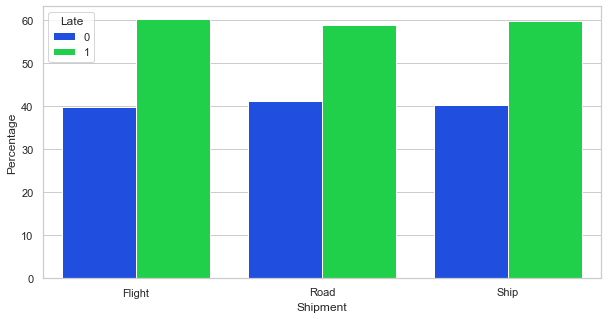

In [108]:
sns.barplot(x = 'Shipment', y = 'Percentage' , data = df_ship, hue = 'Late')

<AxesSubplot:xlabel='Shipment', ylabel='count'>

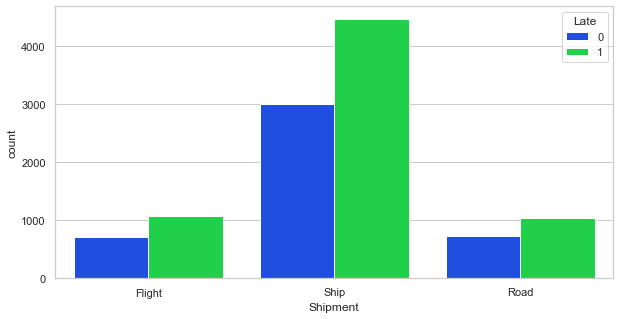

In [109]:
sns.countplot(x = 'Shipment', data = df, hue = 'Late')

In [110]:
df_warehouse = df.groupby(['Warehouse', 'Late']).agg({'ID' : 'count' }).reset_index()
df_warehouse.columns = ['Warehouse', 'Late', 'Count']
df_warehouse['Total'] = df_warehouse.groupby(['Warehouse'])['Count'].transform('sum')
df_warehouse['Percentage'] = round(df_warehouse['Count'] / df_warehouse['Total'] * 100, 2)
df_warehouse

,Warehouse,Late,Count,Total,Percentage
0,A,0,758,1833,41.35
1,A,1,1075,1833,58.65
2,B,0,729,1833,39.77
3,B,1,1104,1833,60.23
4,C,0,739,1833,40.32
5,C,1,1094,1833,59.68
6,D,0,738,1834,40.24
7,D,1,1096,1834,59.76
8,F,0,1472,3666,40.15
9,F,1,2194,3666,59.85


<AxesSubplot:xlabel='Warehouse', ylabel='Percentage'>

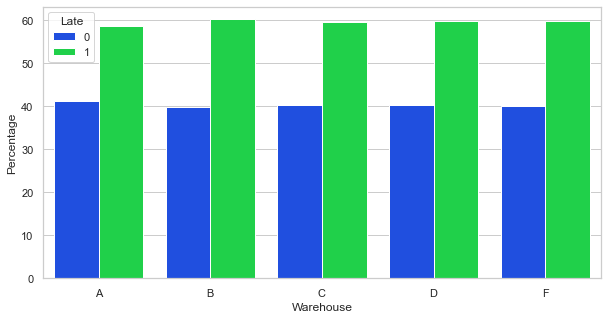

In [111]:
sns.barplot(x = 'Warehouse', y = 'Percentage' , data = df_warehouse, hue = 'Late')

<AxesSubplot:xlabel='Warehouse', ylabel='count'>

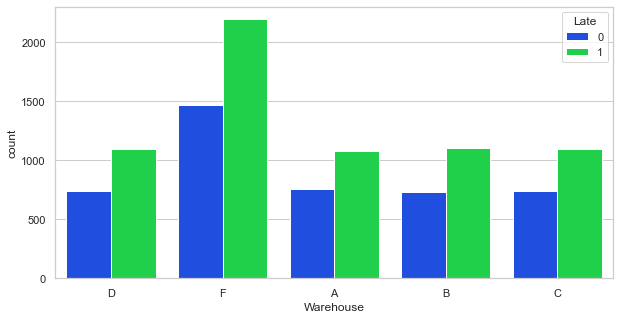

In [112]:
sns.countplot(x = 'Warehouse', data = df, hue = 'Late')

In [113]:
df_calls = df.groupby(['Calls', 'Late']).agg({'ID' : 'count' }).reset_index()
df_calls.columns = ['Calls', 'Late', 'Count']
df_calls['Total'] = df_calls.groupby(['Calls'])['Count'].transform('sum')
df_calls['Percentage'] = round(df_calls['Count'] / df_calls['Total'] * 100, 2)
df_calls

,Calls,Late,Count,Total,Percentage
0,2,0,222,638,34.80
1,2,1,416,638,65.20
2,3,0,1206,3217,37.49
3,3,1,2011,3217,62.51
4,4,0,1431,3557,40.23
5,4,1,2126,3557,59.77
6,5,0,968,2328,41.58
7,5,1,1360,2328,58.42
8,6,0,490,1013,48.37
9,6,1,523,1013,51.63


<AxesSubplot:xlabel='Calls', ylabel='Percentage'>

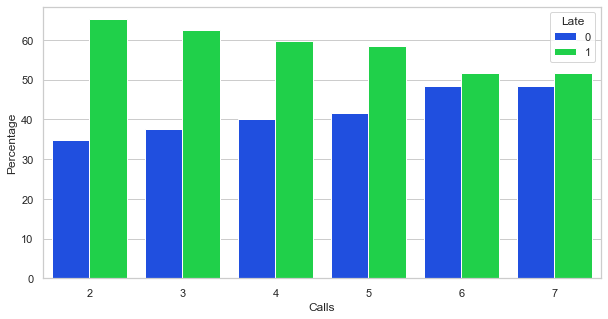

In [114]:
sns.barplot(x = 'Calls', y = 'Percentage' , data = df_calls, hue = 'Late')

<AxesSubplot:xlabel='Calls', ylabel='count'>

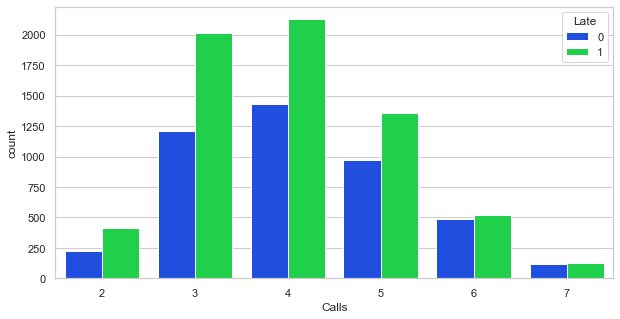

In [115]:
sns.countplot(x = 'Calls', data = df, hue = 'Late')

In [116]:
df_importance = df.groupby(['Importance', 'Late']).agg({'ID' : 'count' }).reset_index()
df_importance.columns = ['Importance', 'Late', 'Count']
df_importance['Total'] = df_importance.groupby(['Importance'])['Count'].transform('sum')
df_importance['Percentage'] = round(df_importance['Count'] / df_importance['Total'] * 100, 2)
df_importance

,Importance,Late,Count,Total,Percentage
0,high,0,332,948,35.02
1,high,1,616,948,64.98
2,low,0,2157,5297,40.72
3,low,1,3140,5297,59.28
4,medium,0,1947,4754,40.95
5,medium,1,2807,4754,59.05


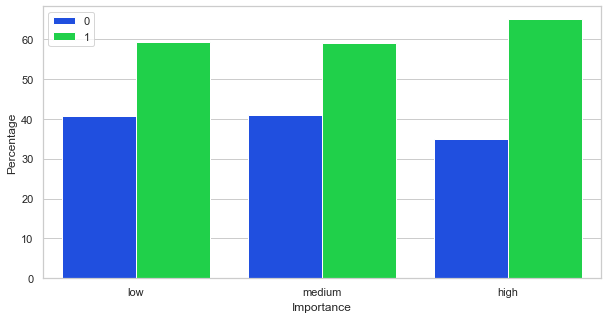

In [117]:
sns.barplot(x = 'Importance', y = 'Percentage' , data = df_importance, hue = 'Late', 
           order = ['low', 'medium', 'high'])
plt.legend(loc= 'upper left')

<AxesSubplot:xlabel='Importance', ylabel='count'>

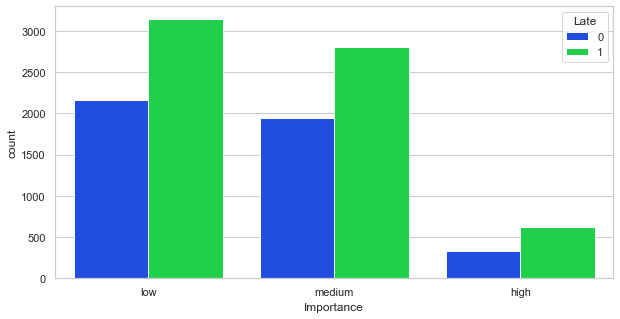

In [118]:
sns.countplot(x = 'Importance', data = df, hue = 'Late')

In [119]:
number=np.arange(0,80,0+10)

In [120]:
df_disc = df.groupby(['Discount', 'Late']).agg({'ID' : 'count' }).reset_index()
df_disc.columns = ['Discount', 'Late', 'Count']
df_disc['Class']=pd.cut(df_disc['Discount'], bins= number, labels= ['0-10','10-20','20-30','30-40','40-50','50-60','60-70'])
df_disc

,Discount,Late,Count,Class
0,1,0,427,0-10
1,1,1,397,0-10
2,2,0,443,0-10
3,2,1,415,0-10
4,3,0,439,0-10
...,...,...,...,...
70,61,1,53,60-70
71,62,1,49,60-70
72,63,1,53,60-70
73,64,1,43,60-70


<AxesSubplot:xlabel='Class', ylabel='Count'>

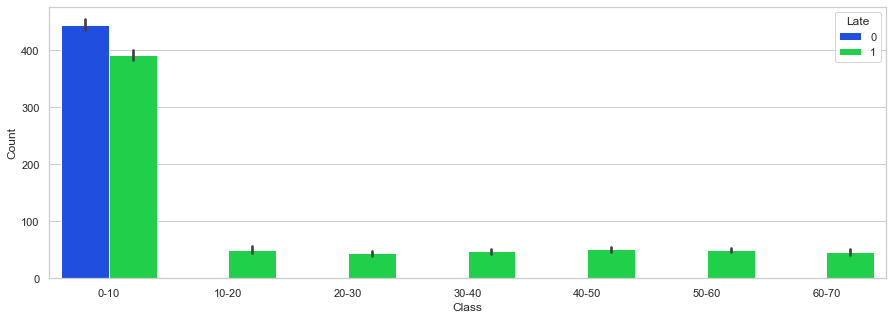

In [121]:
plt.figure(figsize=(15, 5))
sns.barplot(x ='Class',y='Count', data = df_disc, hue = 'Late')

In [122]:
df_purchase = df.groupby(['Purchase', 'Late']).agg({'ID' : 'count' }).reset_index()
df_purchase.columns = ['Purchase', 'Late', 'Count']
df_purchase['Total'] = df_purchase.groupby(['Purchase'])['Count'].transform('sum')
df_purchase['Percentage'] = round(df_purchase['Count'] / df_purchase['Total'] * 100, 2)
df_purchase

,Purchase,Late,Count,Total,Percentage
0,2,0,974,2599,37.48
1,2,1,1625,2599,62.52
2,3,0,1421,3955,35.93
3,3,1,2534,3955,64.07
4,4,0,984,2155,45.66
5,4,1,1171,2155,54.34
6,5,0,645,1287,50.12
7,5,1,642,1287,49.88
8,6,0,247,561,44.03
9,6,1,314,561,55.97


<AxesSubplot:xlabel='Purchase', ylabel='Percentage'>

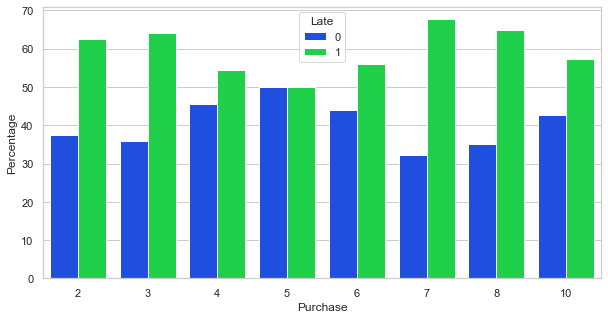

In [123]:
sns.barplot(x = 'Purchase', y = 'Percentage' , data = df_purchase, hue = 'Late')

<AxesSubplot:xlabel='Purchase', ylabel='count'>

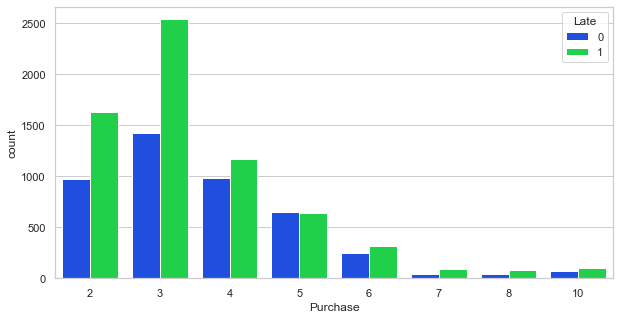

In [124]:
sns.countplot(x = 'Purchase', data = df, hue = 'Late')

#### Heatmap

<AxesSubplot:>

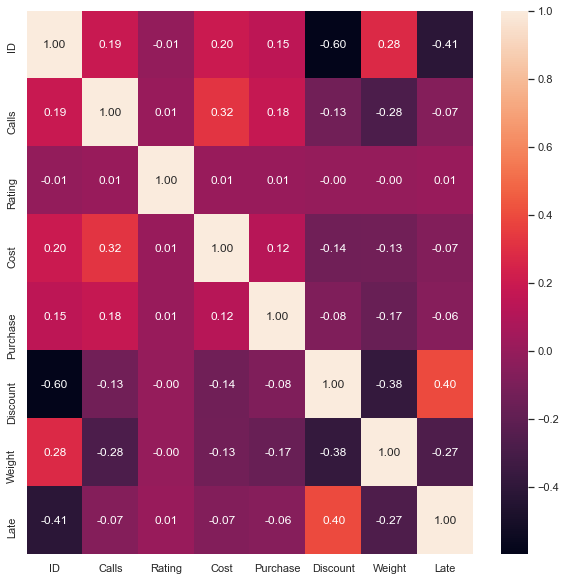

In [125]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, fmt='.2f')

#### Pairplot

<Figure size 720x720 with 0 Axes>

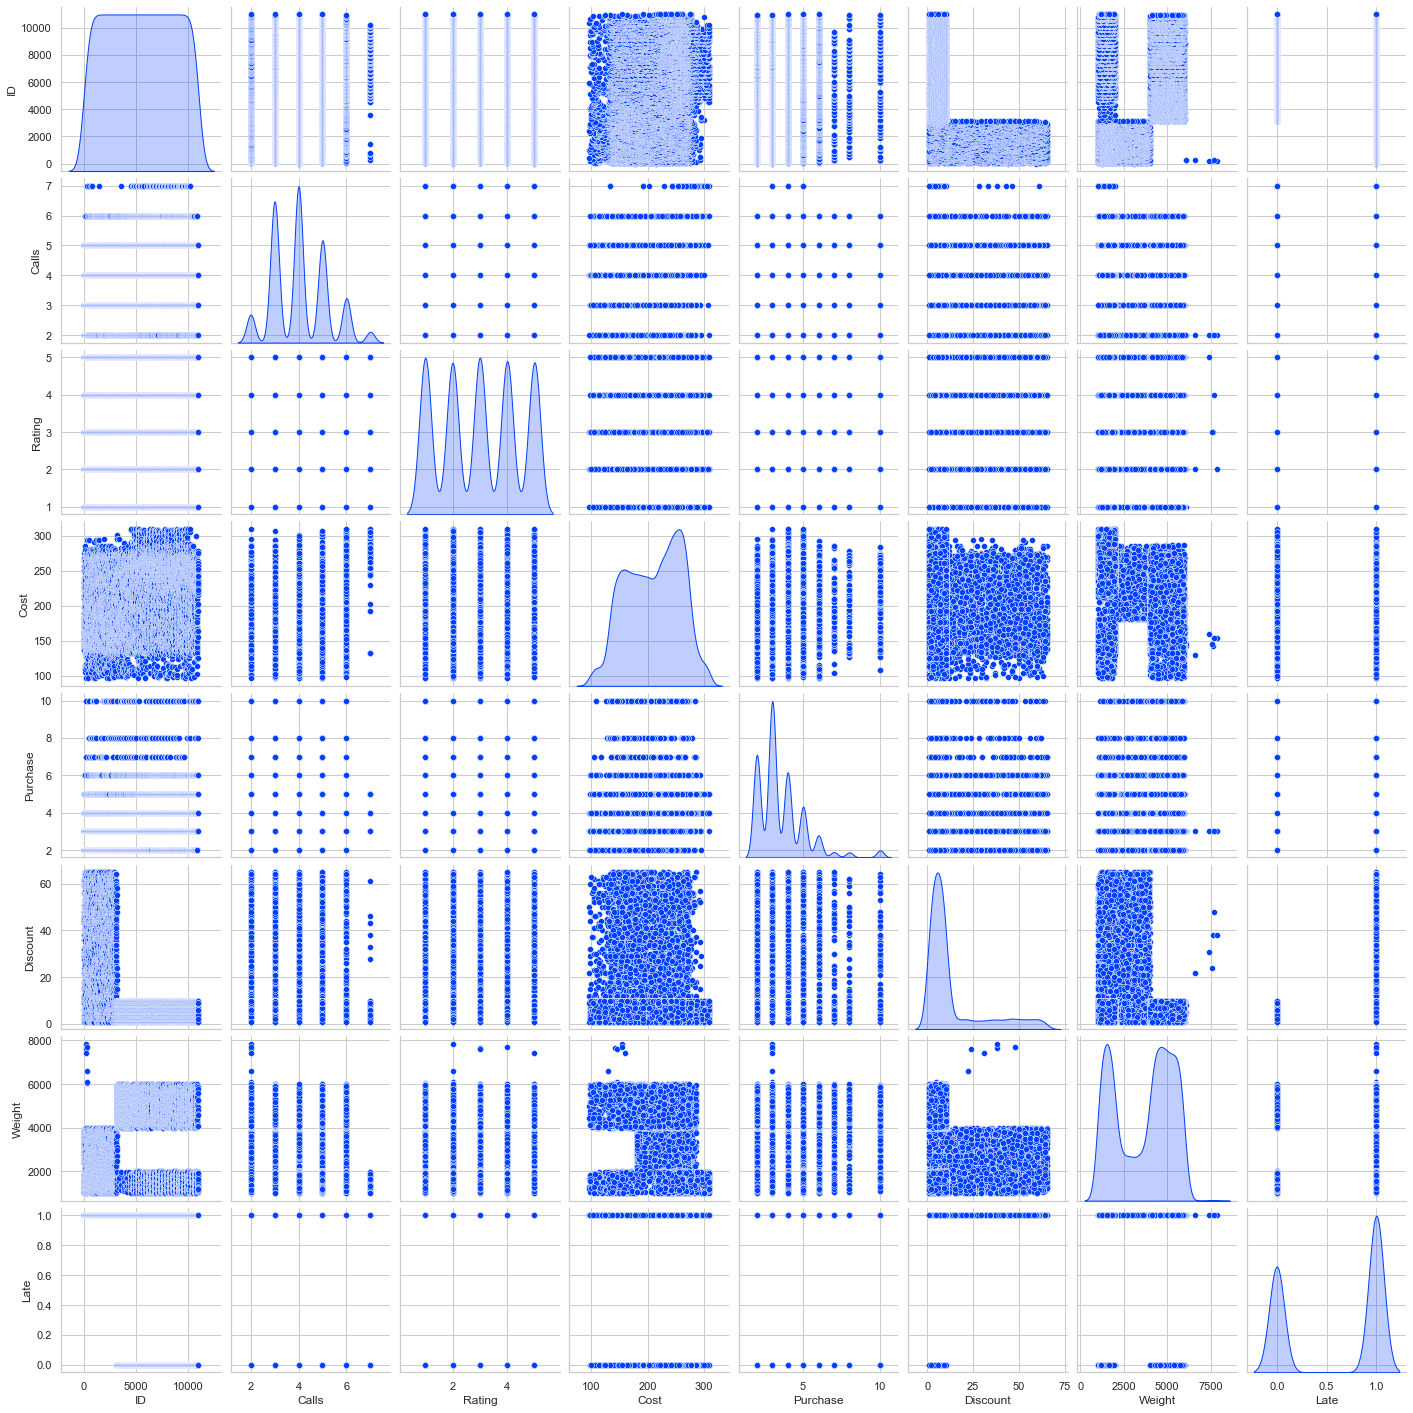

In [126]:
plt.figure(figsize=(10, 10))
sns.pairplot(df, diag_kind='kde')

<Figure size 720x720 with 0 Axes>

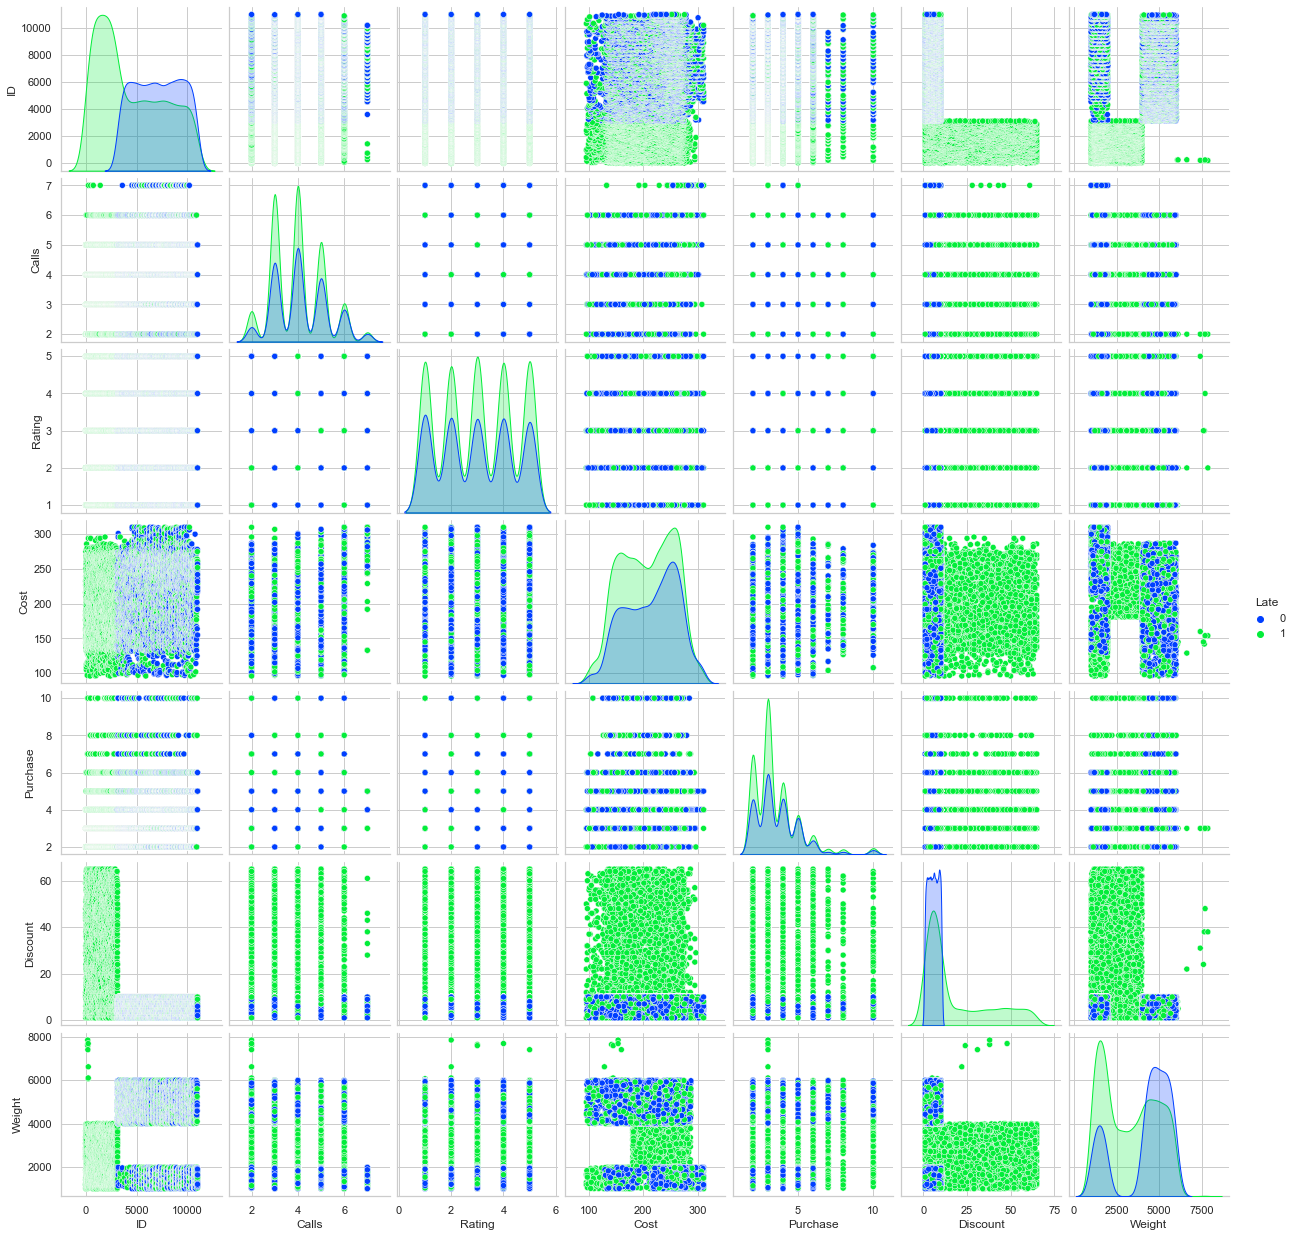

In [127]:
plt.figure(figsize=(10, 10))
sns.pairplot(df, diag_kind='kde', hue='Late')

#### Catplot

<Figure size 864x576 with 0 Axes>

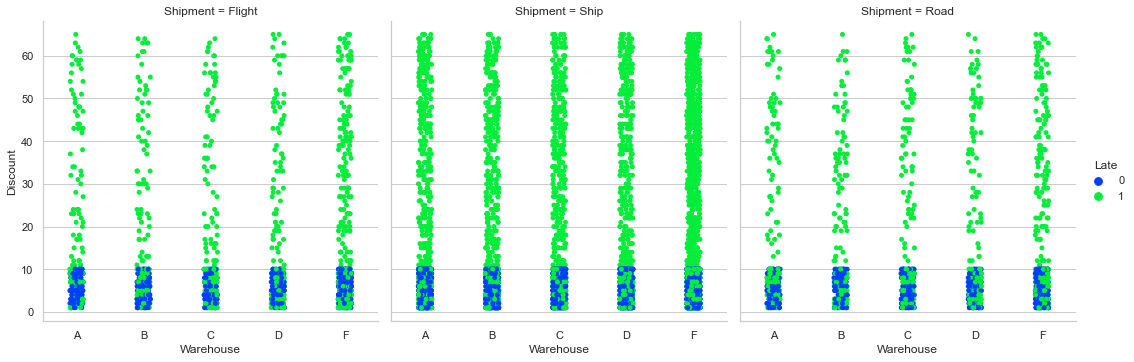

In [128]:
#Categorical Plot -  Sebaran pengiriman telat atau tidak dari feature Diskon yang di kelompokkan terhadap Warehouse dan Jenis Pengiriman
plt.figure(figsize=(12, 8))
sns.catplot(x='Warehouse', y='Discount', hue='Late', col='Shipment', data=df, order=['A', 'B', 'C', 'D', 'F'])

<Figure size 864x576 with 0 Axes>

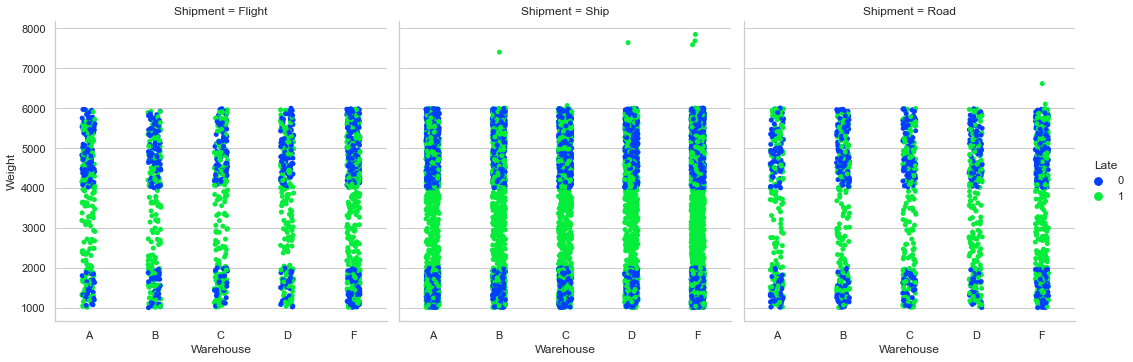

In [129]:
#Categorical Plot -  Sebaran pengiriman telat atau tidak dari feature Berat yang di kelompokkan terhadap Warehouse dan Jenis Pengiriman
plt.figure(figsize=(12, 8))
sns.catplot(x='Warehouse', y='Weight', hue='Late', col='Shipment', data=df, order=['A', 'B', 'C', 'D', 'F'])

<Figure size 864x576 with 0 Axes>

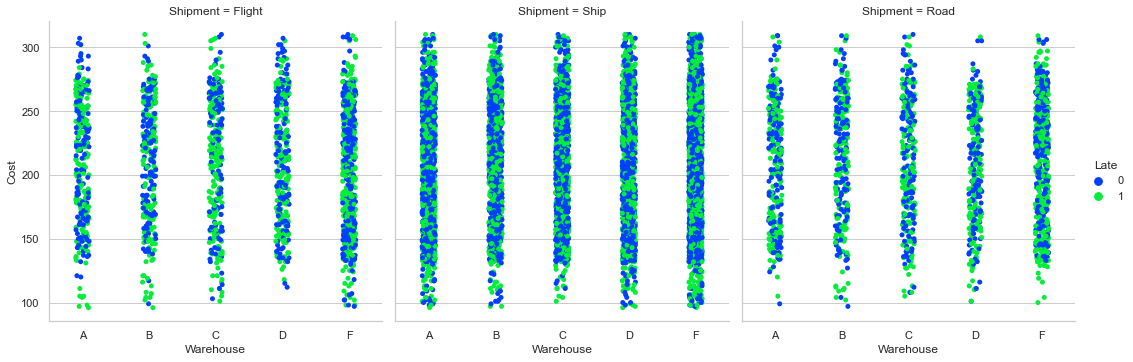

In [130]:
#Categorical Plot -  Sebaran pengiriman telat atau tidak dari feature Harga yang di kelompokkan terhadap Warehouse dan Jenis Pengiriman
plt.figure(figsize=(12, 8))
sns.catplot(x='Warehouse', y='Cost', hue='Late', col='Shipment', data=df, order=['A', 'B', 'C', 'D', 'F'])

<Figure size 864x576 with 0 Axes>

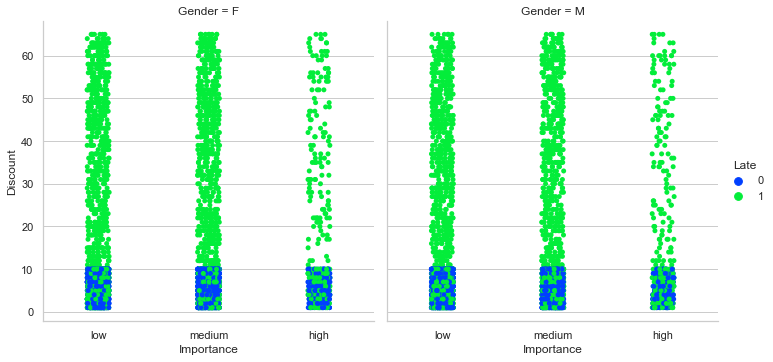

In [131]:
#Categorical Plot -  Sebaran pengiriman telat atau tidak dari feature Diskon yang di kelompokkan terhadap Product Importance dan Gender
plt.figure(figsize=(12, 8))
sns.catplot(x='Importance', y='Discount', hue='Late', col='Gender', data=df)

<Figure size 864x576 with 0 Axes>

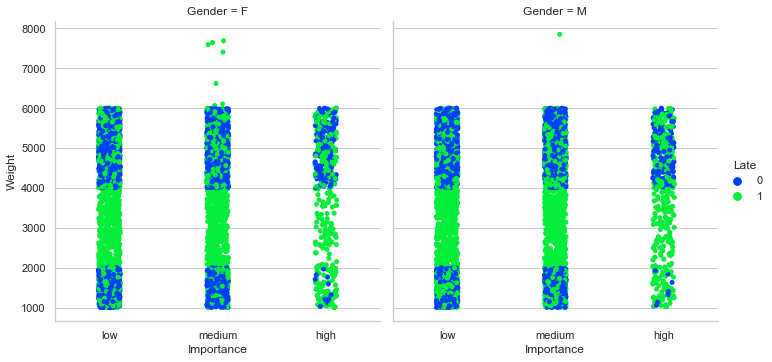

In [132]:
#Categorical Plot -  Sebaran pengiriman telat atau tidak dari feature Berat yang di kelompokkan terhadap Product Importance dan Gender
plt.figure(figsize=(12, 8))
sns.catplot(x='Importance', y='Weight', hue='Late', col='Gender', data=df)

<Figure size 864x576 with 0 Axes>

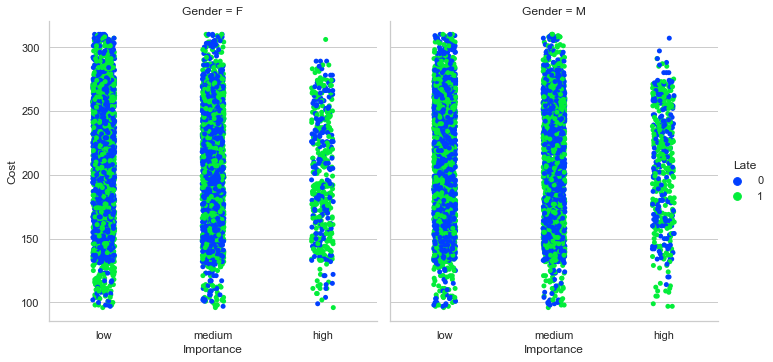

In [133]:
#Categorical Plot -  Sebaran pengiriman telat atau tidak dari feature Harga yang di kelompokkan terhadap Product Importance dan Gender
plt.figure(figsize=(12, 8))
sns.catplot(x='Importance', y='Cost', hue='Late', col='Gender', data=df)

In [134]:
#Untuk Grup by berdasarkan pengelompokan Diskon
dfdiscount = df[['Discount','Late']]
discount_cat = []

for index, kolom in dfdiscount.iterrows():
    if kolom['Discount']>=0 and kolom['Discount']<=10:
        discount_cat.append('1 sd 10')
    elif kolom['Discount']>=11 and kolom['Discount']<=20:
        discount_cat.append('11 sd 20')
    elif kolom['Discount']>=21 and kolom['Discount']<=30:
        discount_cat.append('21 sd 30')    
    else:
        discount_cat.append('diatas 30')

        
dfdiscount['discount_cat'] = discount_cat
dfdiscount = dfdiscount.groupby(['discount_cat','Late'])['Discount'].count().reset_index()
dfdiscount.columns = ['discount_cat', 'Late', 'SubTotal']
dfdiscount['Total'] = dfdiscount.groupby('discount_cat')['SubTotal'].transform('sum')
dfdiscount['Late_Percentage'] = round((dfdiscount['SubTotal'] / dfdiscount['Total']) * 100, 2)
dfdiscount[dfdiscount['Late']==1]

,discount_cat,Late,SubTotal,Total,Late_Percentage
1,1 sd 10,1,3916,8352,46.89
2,11 sd 20,1,496,496,100.00
3,21 sd 30,1,441,441,100.00
4,diatas 30,1,1710,1710,100.00


In [135]:
dfweight = df[['Weight','Late']]
weight_cat = []

for index, kolom in dfweight.iterrows():
    if kolom['Weight']>=0 and kolom['Weight']<=2000:
        weight_cat.append('0 sd 2000')
    elif kolom['Weight']>=2001 and kolom['Weight']<=4000:
        weight_cat.append('2001 sd 4000')    
    else:
        weight_cat.append('4001 sd 6000')

        
dfweight['weight_cat'] = weight_cat
dfweight = dfweight.groupby(['weight_cat','Late'])['Weight'].count().reset_index()
dfweight.columns = ['weight_cat', 'Late', 'SubTotal']
dfweight['Total'] = dfweight.groupby('weight_cat')['SubTotal'].transform('sum')
dfweight['Late_Percentage'] = round((dfweight['SubTotal'] / dfweight['Total']) * 100, 2)
dfweight[dfweight['Late']==1]

,weight_cat,Late,SubTotal,Total,Late_Percentage
1,0 sd 2000,1,2199,3245,67.77
3,2001 sd 4000,1,1787,1788,99.94
5,4001 sd 6000,1,2577,5966,43.19


# Dataframe

There are 6 Dataframes used for modelling:

 - df = No Null No Duplicate, No Outlier Treatment
 - dfori = df with feature encoding and normalization
 - df_project =  Removed outliers from 'prior purchase' column, replace outliers on 'discount offered' with IQR Limit 1,5.
 - dfno_outlier = Remove all outliers based on IQR limit 1,5.
 - dflimit = Replace outliers with IQR Limit 1,5.
 - df_transformasi = df with log transformation.

## df

In [136]:
df.head()

,ID,Warehouse,Shipment,Calls,Rating,Cost,Purchase,Importance,Gender,Discount,Weight,Late
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          10999 non-null  int64 
 1   Warehouse   10999 non-null  object
 2   Shipment    10999 non-null  object
 3   Calls       10999 non-null  int64 
 4   Rating      10999 non-null  int64 
 5   Cost        10999 non-null  int64 
 6   Purchase    10999 non-null  int64 
 7   Importance  10999 non-null  object
 8   Gender      10999 non-null  object
 9   Discount    10999 non-null  int64 
 10  Weight      10999 non-null  int64 
 11  Late        10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


### Missing Value

In [138]:
df.isna().sum()

ID            0
Warehouse     0
Shipment      0
Calls         0
Rating        0
Cost          0
Purchase      0
Importance    0
Gender        0
Discount      0
Weight        0
Late          0
dtype: int64

### Duplicate Value

In [139]:
df.duplicated().sum()

0

In [140]:
df.duplicated(subset=['ID','Warehouse','Shipment']).sum()

0

## dfori

In [141]:
dfori = df.copy()

### Feature Encoding dfori

In [142]:
dfori.head()

,ID,Warehouse,Shipment,Calls,Rating,Cost,Purchase,Importance,Gender,Discount,Weight,Late
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [143]:
dfori.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          10999 non-null  int64 
 1   Warehouse   10999 non-null  object
 2   Shipment    10999 non-null  object
 3   Calls       10999 non-null  int64 
 4   Rating      10999 non-null  int64 
 5   Cost        10999 non-null  int64 
 6   Purchase    10999 non-null  int64 
 7   Importance  10999 non-null  object
 8   Gender      10999 non-null  object
 9   Discount    10999 non-null  int64 
 10  Weight      10999 non-null  int64 
 11  Late        10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [144]:
#One Hot Encoding
FEwarehouse_ori = pd.get_dummies(dfori['Warehouse'], prefix = 'Warehouse')
FEshipment_ori = pd.get_dummies(dfori['Shipment'], prefix = 'Shipment')
FEGender_ori = pd.get_dummies(dfori['Gender'], prefix = 'Gender')

#Ordinal Encoding
Importance_ordinal_ori = pd.Categorical(dfori['Importance'], categories = ['low', 'medium', 'high'], ordered = True)
labels, unique = pd.factorize(Importance_ordinal_ori, sort = True)

#Concat One Hot Encoding
dfori = pd.concat([dfori, FEwarehouse_ori], axis = 1)
dfori = pd.concat([dfori, FEshipment_ori], axis = 1)
dfori = pd.concat([dfori, FEGender_ori], axis = 1)
dfori['Importance'] = labels

In [145]:
dfori

,ID,Warehouse,Shipment,Calls,Rating,Cost,Purchase,Importance,Gender,Discount,...,Warehouse_A,Warehouse_B,Warehouse_C,Warehouse_D,Warehouse_F,Shipment_Flight,Shipment_Road,Shipment_Ship,Gender_F,Gender_M
0,1,D,Flight,4,2,177,3,0,F,44,...,0,0,0,1,0,1,0,0,1,0
1,2,F,Flight,4,5,216,2,0,M,59,...,0,0,0,0,1,1,0,0,0,1
2,3,A,Flight,2,2,183,4,0,M,48,...,1,0,0,0,0,1,0,0,0,1
3,4,B,Flight,3,3,176,4,1,M,10,...,0,1,0,0,0,1,0,0,0,1
4,5,C,Flight,2,2,184,3,1,F,46,...,0,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,1,F,1,...,1,0,0,0,0,0,0,1,1,0
10995,10996,B,Ship,4,1,232,5,1,F,6,...,0,1,0,0,0,0,0,1,1,0
10996,10997,C,Ship,5,4,242,5,0,F,4,...,0,0,1,0,0,0,0,1,1,0
10997,10998,F,Ship,5,2,223,6,1,M,2,...,0,0,0,0,1,0,0,1,0,1


In [146]:
#Drop Categorical Feature
dfori = dfori.drop(columns = ['ID', 'Warehouse', 'Shipment', 'Gender'])

In [147]:
dfori.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Calls            10999 non-null  int64
 1   Rating           10999 non-null  int64
 2   Cost             10999 non-null  int64
 3   Purchase         10999 non-null  int64
 4   Importance       10999 non-null  int64
 5   Discount         10999 non-null  int64
 6   Weight           10999 non-null  int64
 7   Late             10999 non-null  int64
 8   Warehouse_A      10999 non-null  uint8
 9   Warehouse_B      10999 non-null  uint8
 10  Warehouse_C      10999 non-null  uint8
 11  Warehouse_D      10999 non-null  uint8
 12  Warehouse_F      10999 non-null  uint8
 13  Shipment_Flight  10999 non-null  uint8
 14  Shipment_Road    10999 non-null  uint8
 15  Shipment_Ship    10999 non-null  uint8
 16  Gender_F         10999 non-null  uint8
 17  Gender_M         10999 non-null  uint8
dtypes: int

### Feature Normalization dfori

In [148]:
ori_type = ['int64', 'uint8']
num_dfori = dfori.select_dtypes(include = ori_type)
nums_ori = num_dfori.columns
print(nums_ori)

Index(['Calls', 'Rating', 'Cost', 'Purchase', 'Importance', 'Discount',
       'Weight', 'Late', 'Warehouse_A', 'Warehouse_B', 'Warehouse_C',
       'Warehouse_D', 'Warehouse_F', 'Shipment_Flight', 'Shipment_Road',
       'Shipment_Ship', 'Gender_F', 'Gender_M'],
      dtype='object')


In [149]:
for i in range(len(nums_ori)):
    dfori[nums_ori[i]] = MinMaxScaler().fit_transform(dfori[nums_ori[i]].values.reshape(len(dfori), 1))

In [150]:
dfori.head(10)

,Calls,Rating,Cost,Purchase,Importance,Discount,Weight,Late,Warehouse_A,Warehouse_B,Warehouse_C,Warehouse_D,Warehouse_F,Shipment_Flight,Shipment_Road,Shipment_Ship,Gender_F,Gender_M
0,0.4,0.25,0.378505,0.125,0.0,0.671875,0.033893,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.4,1.00,0.560748,0.000,0.0,0.906250,0.304894,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
2,0.0,0.25,0.406542,0.250,0.0,0.734375,0.346676,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.2,0.50,0.373832,0.250,0.5,0.140625,0.025712,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.0,0.25,0.411215,0.125,0.5,0.703125,0.216654,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5,0.2,0.00,0.308411,0.125,0.5,0.171875,0.060774,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
6,0.2,0.75,0.719626,0.125,0.0,0.031250,0.200146,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
7,0.4,0.00,0.640187,0.000,0.0,0.734375,0.263404,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
8,0.2,0.75,0.252336,0.125,0.0,0.156250,0.125639,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
9,0.2,0.25,0.317757,0.125,0.5,0.437500,0.027173,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


## df_project

### Feature Encoding df_project

In [151]:
df_project=df.copy()

In [152]:
#One Hot Encoding
FEwarehouse_project = pd.get_dummies(df_project['Warehouse'], prefix = 'Warehouse')
FEshipment_project = pd.get_dummies(df_project['Shipment'], prefix = 'Shipment')
FEGender_project = pd.get_dummies(df_project['Gender'], prefix = 'Gender')

#Ordinal Encoding
Importance_ordinal_project = pd.Categorical(df_project['Importance'], categories = ['low', 'medium', 'high'], ordered = True)
labels, unique = pd.factorize(Importance_ordinal_project, sort = True)

#Concat One Hot Encoding
df_project = pd.concat([df_project, FEwarehouse_project], axis = 1)
df_project = pd.concat([df_project, FEshipment_project], axis = 1)
df_project = pd.concat([df_project, FEGender_project], axis = 1)
df_project['Importance'] = labels

In [153]:
df_project.head()

,ID,Warehouse,Shipment,Calls,Rating,Cost,Purchase,Importance,Gender,Discount,...,Warehouse_A,Warehouse_B,Warehouse_C,Warehouse_D,Warehouse_F,Shipment_Flight,Shipment_Road,Shipment_Ship,Gender_F,Gender_M
0,1,D,Flight,4,2,177,3,0,F,44,...,0,0,0,1,0,1,0,0,1,0
1,2,F,Flight,4,5,216,2,0,M,59,...,0,0,0,0,1,1,0,0,0,1
2,3,A,Flight,2,2,183,4,0,M,48,...,1,0,0,0,0,1,0,0,0,1
3,4,B,Flight,3,3,176,4,1,M,10,...,0,1,0,0,0,1,0,0,0,1
4,5,C,Flight,2,2,184,3,1,F,46,...,0,0,1,0,0,1,0,0,1,0


In [154]:
#Drop Categorical Feature
df_project = df_project.drop(columns = ['ID', 'Warehouse', 'Shipment', 'Gender'])

In [155]:
df_project.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Calls            10999 non-null  int64
 1   Rating           10999 non-null  int64
 2   Cost             10999 non-null  int64
 3   Purchase         10999 non-null  int64
 4   Importance       10999 non-null  int64
 5   Discount         10999 non-null  int64
 6   Weight           10999 non-null  int64
 7   Late             10999 non-null  int64
 8   Warehouse_A      10999 non-null  uint8
 9   Warehouse_B      10999 non-null  uint8
 10  Warehouse_C      10999 non-null  uint8
 11  Warehouse_D      10999 non-null  uint8
 12  Warehouse_F      10999 non-null  uint8
 13  Shipment_Flight  10999 non-null  uint8
 14  Shipment_Road    10999 non-null  uint8
 15  Shipment_Ship    10999 non-null  uint8
 16  Gender_F         10999 non-null  uint8
 17  Gender_M         10999 non-null  uint8
dtypes: int

### Feature Normalization df_project

In [156]:
project_type = ['int64', 'uint8']
num_df_project = df_project.select_dtypes(include = project_type)
nums_project = num_df_project.columns
print(nums_project)

Index(['Calls', 'Rating', 'Cost', 'Purchase', 'Importance', 'Discount',
       'Weight', 'Late', 'Warehouse_A', 'Warehouse_B', 'Warehouse_C',
       'Warehouse_D', 'Warehouse_F', 'Shipment_Flight', 'Shipment_Road',
       'Shipment_Ship', 'Gender_F', 'Gender_M'],
      dtype='object')


In [157]:
for i in range(len(nums_project)):
    df_project[nums_project[i]] = MinMaxScaler().fit_transform(df_project[nums_project[i]].values.reshape(len(df_project), 1))

In [158]:
df_project.head(10)

,Calls,Rating,Cost,Purchase,Importance,Discount,Weight,Late,Warehouse_A,Warehouse_B,Warehouse_C,Warehouse_D,Warehouse_F,Shipment_Flight,Shipment_Road,Shipment_Ship,Gender_F,Gender_M
0,0.4,0.25,0.378505,0.125,0.0,0.671875,0.033893,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.4,1.00,0.560748,0.000,0.0,0.906250,0.304894,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
2,0.0,0.25,0.406542,0.250,0.0,0.734375,0.346676,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.2,0.50,0.373832,0.250,0.5,0.140625,0.025712,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.0,0.25,0.411215,0.125,0.5,0.703125,0.216654,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5,0.2,0.00,0.308411,0.125,0.5,0.171875,0.060774,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
6,0.2,0.75,0.719626,0.125,0.0,0.031250,0.200146,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
7,0.4,0.00,0.640187,0.000,0.0,0.734375,0.263404,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
8,0.2,0.75,0.252336,0.125,0.0,0.156250,0.125639,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
9,0.2,0.25,0.317757,0.125,0.5,0.437500,0.027173,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [159]:
df_project.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Calls            10999 non-null  float64
 1   Rating           10999 non-null  float64
 2   Cost             10999 non-null  float64
 3   Purchase         10999 non-null  float64
 4   Importance       10999 non-null  float64
 5   Discount         10999 non-null  float64
 6   Weight           10999 non-null  float64
 7   Late             10999 non-null  float64
 8   Warehouse_A      10999 non-null  float64
 9   Warehouse_B      10999 non-null  float64
 10  Warehouse_C      10999 non-null  float64
 11  Warehouse_D      10999 non-null  float64
 12  Warehouse_F      10999 non-null  float64
 13  Shipment_Flight  10999 non-null  float64
 14  Shipment_Road    10999 non-null  float64
 15  Shipment_Ship    10999 non-null  float64
 16  Gender_F         10999 non-null  float64
 17  Gender_M    

### Remove Outliers

In [160]:
#Check with Z-Score

print(f'Number of rows before erasing outliers: {len(df_project)}')

filtered_entries = np.array([True] * len(df_project))
for col in ['Calls', 'Cost']:
    zscore = abs(st.zscore(df_project[col]))
    filtered_entries = (zscore < 3) & filtered_entries
    
df_project = df_project[filtered_entries]

print(f'Number of rows after erasing outliers: {len(df_project)}')

#no outliers based from Z-score

Number of rows before erasing outliers: 10999
Number of rows after erasing outliers: 10999


In [161]:
# replace outlier outside 1,5 IQR

print(f'Number of rows before erasing outliers: {len(df_project)}')

filtered_entries = np.array([True] * len(df_project))
for col in ['Purchase']:
    Q1 = df_project[col].quantile(0.25)
    Q3 = df_project[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    filtered_entries = ((df_project[col] >= low_limit) & (df_project[col] <= high_limit)) & filtered_entries
    
df_project = df_project[filtered_entries]

print(f'Number of rows after erasing outliers: {len(df_project)}')

Number of rows before erasing outliers: 10999
Number of rows after erasing outliers: 9996


<AxesSubplot:xlabel='Discount', ylabel='Density'>

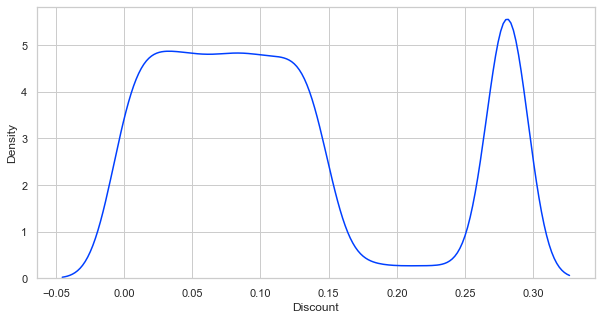

In [162]:
#Ganti dengan max IQR

Q1_discount = df_project['Discount'].quantile(0.25)
Q3_discount = df_project['Discount'].quantile(0.75)
IQR_discount = Q3_discount - Q1_discount
low_limit_discount = Q1_discount - (IQR_discount * 1.5)
high_limit_discount = Q3_discount + (IQR_discount * 1.5)
df_project['Discount'].loc[df_project['Discount'] > high_limit_discount] = high_limit_discount

sns.kdeplot(x='Discount',data=df_project)

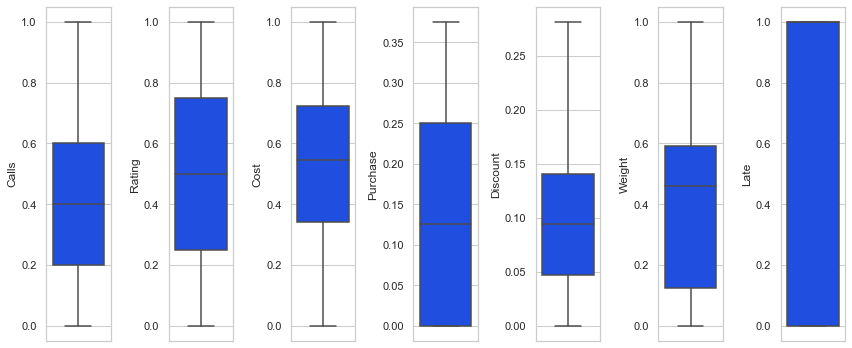

In [163]:
plt.figure(figsize=(12, 5))
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.boxplot(y=df_project[nums[i]], orient='v')
    plt.tight_layout()

In [164]:
df_project.head()

,Calls,Rating,Cost,Purchase,Importance,Discount,Weight,Late,Warehouse_A,Warehouse_B,Warehouse_C,Warehouse_D,Warehouse_F,Shipment_Flight,Shipment_Road,Shipment_Ship,Gender_F,Gender_M
0,0.4,0.25,0.378505,0.125,0.0,0.281250,0.033893,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.4,1.00,0.560748,0.000,0.0,0.281250,0.304894,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
2,0.0,0.25,0.406542,0.250,0.0,0.281250,0.346676,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.2,0.50,0.373832,0.250,0.5,0.140625,0.025712,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.0,0.25,0.411215,0.125,0.5,0.281250,0.216654,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [165]:
df_project.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9996 entries, 0 to 10998
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Calls            9996 non-null   float64
 1   Rating           9996 non-null   float64
 2   Cost             9996 non-null   float64
 3   Purchase         9996 non-null   float64
 4   Importance       9996 non-null   float64
 5   Discount         9996 non-null   float64
 6   Weight           9996 non-null   float64
 7   Late             9996 non-null   float64
 8   Warehouse_A      9996 non-null   float64
 9   Warehouse_B      9996 non-null   float64
 10  Warehouse_C      9996 non-null   float64
 11  Warehouse_D      9996 non-null   float64
 12  Warehouse_F      9996 non-null   float64
 13  Shipment_Flight  9996 non-null   float64
 14  Shipment_Road    9996 non-null   float64
 15  Shipment_Ship    9996 non-null   float64
 16  Gender_F         9996 non-null   float64
 17  Gender_M     

## dfno_outlier

### Remove Outliers

In [166]:
dfno_outlier = df.copy()

In [167]:
print('Number of row dfno_outliers before removeing outliers', len(dfno_outlier))

filtered_entries = np.array([True] * len(dfno_outlier))
for col in ['Purchase', 'Discount']:
    Q1 = dfno_outlier[col].quantile(0.25)
    Q3 = dfno_outlier[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    filtered_entries = ((dfno_outlier[col] >= low_limit) & (dfno_outlier[col] <= high_limit)) & filtered_entries
    
dfno_outlier = dfno_outlier[filtered_entries]

print('Number of row dfno_outliers after removing outliers', len(dfno_outlier))

Number of row dfno_outliers before removeing outliers 10999
Number of row dfno_outliers after removing outliers 7971


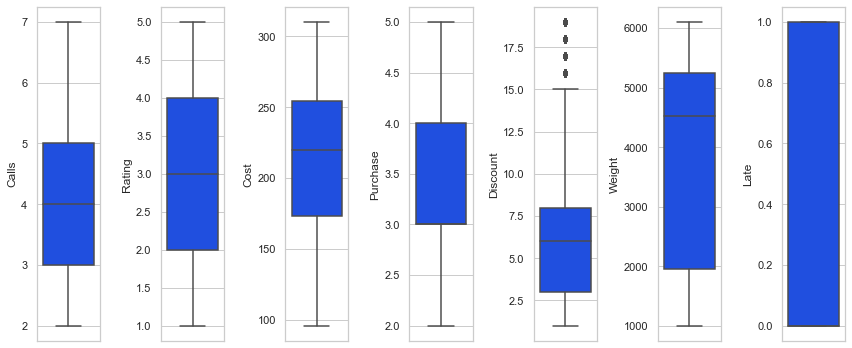

In [168]:
plt.figure(figsize=(12, 5))
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.boxplot(y=dfno_outlier[nums[i]], orient='v')
    plt.tight_layout()

### Feature Encoding dfno_outlier

In [169]:
#One Hot Encoding
FEwarehouse_no_outlier = pd.get_dummies(dfno_outlier['Warehouse'], prefix = 'Warehouse')
FEshipment_no_outlier = pd.get_dummies(dfno_outlier['Shipment'], prefix = 'Shipment')
FEGender_no_outlier = pd.get_dummies(dfno_outlier['Gender'], prefix = 'Gender')

#Ordinal Encoding
Importance_ordinal_no_outlier = pd.Categorical(dfno_outlier['Importance'], categories = ['low', 'medium', 'high'], ordered = True)
labels, unique = pd.factorize(Importance_ordinal_no_outlier, sort = True)

#Concat One Hot Encoding
dfno_outlier = pd.concat([dfno_outlier, FEwarehouse_no_outlier], axis = 1)
dfno_outlier = pd.concat([dfno_outlier, FEshipment_no_outlier], axis = 1)
dfno_outlier = pd.concat([dfno_outlier, FEGender_no_outlier], axis = 1)
dfno_outlier['Importance'] = labels

In [170]:
#Drop Categorical Feature
dfno_outlier = dfno_outlier.drop(columns = ['ID', 'Warehouse', 'Shipment', 'Gender'])

In [171]:
dfno_outlier.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7971 entries, 3 to 10998
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Calls            7971 non-null   int64
 1   Rating           7971 non-null   int64
 2   Cost             7971 non-null   int64
 3   Purchase         7971 non-null   int64
 4   Importance       7971 non-null   int64
 5   Discount         7971 non-null   int64
 6   Weight           7971 non-null   int64
 7   Late             7971 non-null   int64
 8   Warehouse_A      7971 non-null   uint8
 9   Warehouse_B      7971 non-null   uint8
 10  Warehouse_C      7971 non-null   uint8
 11  Warehouse_D      7971 non-null   uint8
 12  Warehouse_F      7971 non-null   uint8
 13  Shipment_Flight  7971 non-null   uint8
 14  Shipment_Road    7971 non-null   uint8
 15  Shipment_Ship    7971 non-null   uint8
 16  Gender_F         7971 non-null   uint8
 17  Gender_M         7971 non-null   uint8
dtypes: int6

In [172]:
dfno_outlier.describe()

,Calls,Rating,Cost,Purchase,Importance,Discount,Weight,Late,Warehouse_A,Warehouse_B,Warehouse_C,Warehouse_D,Warehouse_F,Shipment_Flight,Shipment_Road,Shipment_Ship,Gender_F,Gender_M
count,7971.000000,7971.000000,7971.000000,7971.000000,7971.000000,7971.000000,7971.000000,7971.000000,7971.000000,7971.000000,7971.000000,7971.000000,7971.000000,7971.000000,7971.000000,7971.000000,7971.000000,7971.000000
mean,4.132982,2.993602,213.686238,3.282148,0.580605,5.986953,3956.695772,0.495170,0.169489,0.165977,0.166855,0.168360,0.329319,0.164095,0.157571,0.678334,0.501192,0.498808
std,1.177638,1.413356,48.231331,0.991333,0.629967,3.547644,1619.385342,0.500008,0.375207,0.372083,0.372870,0.374209,0.469995,0.370385,0.364361,0.467145,0.500030,0.500030
min,2.000000,1.000000,96.000000,2.000000,0.000000,1.000000,1001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,2.000000,173.000000,3.000000,0.000000,3.000000,1955.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,3.000000,220.000000,3.000000,1.000000,6.000000,4520.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,5.000000,4.000000,254.000000,4.000000,1.000000,8.000000,5244.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,7.000000,5.000000,310.000000,5.000000,2.000000,19.000000,6102.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Feature Normalization dfno_outlier

In [173]:
no_outlier_type = ['int64', 'uint8']
num_dfno_outlier = dfno_outlier.select_dtypes(include = no_outlier_type)
nums_no_outlier = num_dfno_outlier.columns
print(nums_no_outlier)

Index(['Calls', 'Rating', 'Cost', 'Purchase', 'Importance', 'Discount',
       'Weight', 'Late', 'Warehouse_A', 'Warehouse_B', 'Warehouse_C',
       'Warehouse_D', 'Warehouse_F', 'Shipment_Flight', 'Shipment_Road',
       'Shipment_Ship', 'Gender_F', 'Gender_M'],
      dtype='object')


In [174]:
for i in range(len(nums_no_outlier)):
    dfno_outlier[nums_no_outlier[i]] = MinMaxScaler().fit_transform(dfno_outlier[nums_no_outlier[i]].values.reshape(len(dfno_outlier), 1))

In [175]:
dfno_outlier.describe()

,Calls,Rating,Cost,Purchase,Importance,Discount,Weight,Late,Warehouse_A,Warehouse_B,Warehouse_C,Warehouse_D,Warehouse_F,Shipment_Flight,Shipment_Road,Shipment_Ship,Gender_F,Gender_M
count,7971.000000,7971.000000,7971.000000,7971.000000,7971.000000,7971.000000,7971.000000,7971.000000,7971.000000,7971.000000,7971.000000,7971.000000,7971.000000,7971.000000,7971.000000,7971.000000,7971.000000,7971.000000
mean,0.426596,0.498400,0.549936,0.427383,0.290302,0.277053,0.579435,0.495170,0.169489,0.165977,0.166855,0.168360,0.329319,0.164095,0.157571,0.678334,0.501192,0.498808
std,0.235528,0.353339,0.225380,0.330444,0.314983,0.197091,0.317464,0.500008,0.375207,0.372083,0.372870,0.374209,0.469995,0.370385,0.364361,0.467145,0.500030,0.500030
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.200000,0.250000,0.359813,0.333333,0.000000,0.111111,0.187120,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.400000,0.500000,0.579439,0.333333,0.500000,0.277778,0.689865,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,0.600000,0.750000,0.738318,0.666667,0.500000,0.388889,0.831798,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## dflimit

In [176]:
dflimit = df.copy()

### Replace Outliers with Limit IQR

In [177]:
print('Number of row dflimit before replace with limit IQR', len(dflimit))

for col in ['Purchase', 'Discount']:
    Q1 = dflimit[col].quantile(0.25)
    Q3 = dflimit[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)
    
    dflimit[col] = np.where(dflimit[col] > high_limit, high_limit, dflimit[col])
    dflimit[col] = np.where(dflimit[col] < low_limit, low_limit, dflimit[col])

print('Number of row dflimit after replace with limit IQR', len(dflimit))

Number of row dflimit before replace with limit IQR 10999
Number of row dflimit after replace with limit IQR 10999


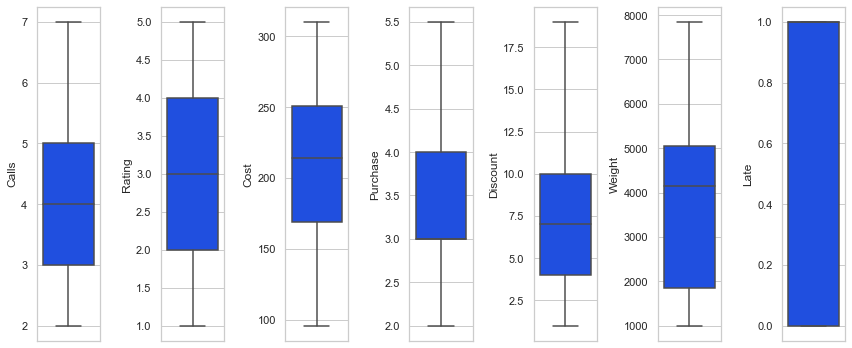

In [178]:
plt.figure(figsize=(12, 5))
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.boxplot(y=dflimit[nums[i]], orient='v')
    plt.tight_layout()

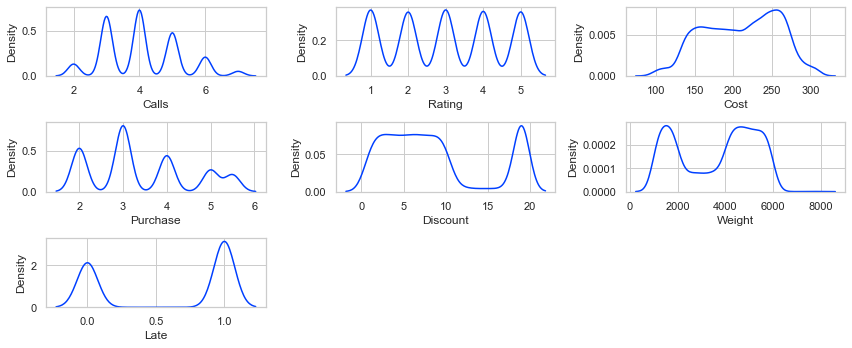

In [179]:
plt.figure(figsize=(12, 5))
for i in range(0, len(nums)):
    plt.subplot(3, len(nums)/2, i+1)
    sns.kdeplot(x = dflimit[nums[i]])
    plt.tight_layout()

### Feature Encoding dflimit

In [180]:
#One Hot Encoding
FEwarehouse_limit = pd.get_dummies(dflimit['Warehouse'], prefix = 'Warehouse')
FEshipment_limit = pd.get_dummies(dflimit['Shipment'], prefix = 'Shipment')
FEGender_limit = pd.get_dummies(dflimit['Gender'], prefix = 'Gender')

#Ordinal Encoding
Importance_ordinal_limit = pd.Categorical(dflimit['Importance'], categories = ['low', 'medium', 'high'], ordered = True)
labels, unique = pd.factorize(Importance_ordinal_limit, sort = True)

#Concat One Hot Encoding
dflimit = pd.concat([dflimit, FEwarehouse_limit], axis = 1)
dflimit = pd.concat([dflimit, FEshipment_limit], axis = 1)
dflimit = pd.concat([dflimit, FEGender_limit], axis = 1)
dflimit['Importance'] = labels

In [181]:
dflimit

,ID,Warehouse,Shipment,Calls,Rating,Cost,Purchase,Importance,Gender,Discount,...,Warehouse_A,Warehouse_B,Warehouse_C,Warehouse_D,Warehouse_F,Shipment_Flight,Shipment_Road,Shipment_Ship,Gender_F,Gender_M
0,1,D,Flight,4,2,177,3.0,0,F,19.0,...,0,0,0,1,0,1,0,0,1,0
1,2,F,Flight,4,5,216,2.0,0,M,19.0,...,0,0,0,0,1,1,0,0,0,1
2,3,A,Flight,2,2,183,4.0,0,M,19.0,...,1,0,0,0,0,1,0,0,0,1
3,4,B,Flight,3,3,176,4.0,1,M,10.0,...,0,1,0,0,0,1,0,0,0,1
4,5,C,Flight,2,2,184,3.0,1,F,19.0,...,0,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5.0,1,F,1.0,...,1,0,0,0,0,0,0,1,1,0
10995,10996,B,Ship,4,1,232,5.0,1,F,6.0,...,0,1,0,0,0,0,0,1,1,0
10996,10997,C,Ship,5,4,242,5.0,0,F,4.0,...,0,0,1,0,0,0,0,1,1,0
10997,10998,F,Ship,5,2,223,5.5,1,M,2.0,...,0,0,0,0,1,0,0,1,0,1


In [182]:
#Drop Categorical Feature
dflimit = dflimit.drop(columns = ['ID', 'Warehouse', 'Shipment', 'Gender'])

In [183]:
dflimit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Calls            10999 non-null  int64  
 1   Rating           10999 non-null  int64  
 2   Cost             10999 non-null  int64  
 3   Purchase         10999 non-null  float64
 4   Importance       10999 non-null  int64  
 5   Discount         10999 non-null  float64
 6   Weight           10999 non-null  int64  
 7   Late             10999 non-null  int64  
 8   Warehouse_A      10999 non-null  uint8  
 9   Warehouse_B      10999 non-null  uint8  
 10  Warehouse_C      10999 non-null  uint8  
 11  Warehouse_D      10999 non-null  uint8  
 12  Warehouse_F      10999 non-null  uint8  
 13  Shipment_Flight  10999 non-null  uint8  
 14  Shipment_Road    10999 non-null  uint8  
 15  Shipment_Ship    10999 non-null  uint8  
 16  Gender_F         10999 non-null  uint8  
 17  Gender_M    

### Feature Normalization dflimit

In [184]:
limit_type = ['int64', 'uint8', 'float64']
num_dflimit = dflimit.select_dtypes(include = limit_type)
nums_limit = num_dflimit.columns
print(nums_limit)

Index(['Calls', 'Rating', 'Cost', 'Purchase', 'Importance', 'Discount',
       'Weight', 'Late', 'Warehouse_A', 'Warehouse_B', 'Warehouse_C',
       'Warehouse_D', 'Warehouse_F', 'Shipment_Flight', 'Shipment_Road',
       'Shipment_Ship', 'Gender_F', 'Gender_M'],
      dtype='object')


In [185]:
for i in range(len(nums_limit)):
    dflimit[nums_limit[i]] = MinMaxScaler().fit_transform(dflimit[nums_limit[i]].values.reshape(len(dflimit), 1))

In [186]:
dflimit.head(10)

,Calls,Rating,Cost,Purchase,Importance,Discount,Weight,Late,Warehouse_A,Warehouse_B,Warehouse_C,Warehouse_D,Warehouse_F,Shipment_Flight,Shipment_Road,Shipment_Ship,Gender_F,Gender_M
0,0.4,0.25,0.378505,0.285714,0.0,1.000000,0.033893,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.4,1.00,0.560748,0.000000,0.0,1.000000,0.304894,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
2,0.0,0.25,0.406542,0.571429,0.0,1.000000,0.346676,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.2,0.50,0.373832,0.571429,0.5,0.500000,0.025712,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.0,0.25,0.411215,0.285714,0.5,1.000000,0.216654,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5,0.2,0.00,0.308411,0.285714,0.5,0.611111,0.060774,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
6,0.2,0.75,0.719626,0.285714,0.0,0.111111,0.200146,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
7,0.4,0.00,0.640187,0.000000,0.0,1.000000,0.263404,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
8,0.2,0.75,0.252336,0.285714,0.0,0.555556,0.125639,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
9,0.2,0.25,0.317757,0.285714,0.5,1.000000,0.027173,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [187]:
dflimit.describe()

,Calls,Rating,Cost,Purchase,Importance,Discount,Weight,Late,Warehouse_A,Warehouse_B,Warehouse_C,Warehouse_D,Warehouse_F,Shipment_Flight,Shipment_Road,Shipment_Ship,Gender_F,Gender_M
count,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,0.410892,0.497636,0.533630,0.406180,0.302300,0.421720,0.384663,0.596691,0.166652,0.166652,0.166652,0.166742,0.333303,0.161560,0.160015,0.678425,0.504137,0.495863
std,0.228298,0.353401,0.224595,0.324829,0.320732,0.338637,0.238916,0.490584,0.372681,0.372681,0.372681,0.372763,0.471415,0.368064,0.366636,0.467102,0.500006,0.500006
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.200000,0.250000,0.341121,0.285714,0.000000,0.166667,0.122498,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.400000,0.500000,0.551402,0.285714,0.500000,0.333333,0.459898,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,0.600000,0.750000,0.724299,0.571429,0.500000,0.500000,0.591527,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## df_transformasi

In [188]:
df_transformasi = df.copy()
transform1 = ['Purchase', 'Discount']
transform_log = transform1.copy()

for i in range(len(transform1)):
    df_transformasi['log '+transform1[i]] = np.log10(df_transformasi[transform1[i]]+0.001)
    transform_log[i] = 'log '+ transform1[i]

df_transformasi.head(5)

,ID,Warehouse,Shipment,Calls,Rating,Cost,Purchase,Importance,Gender,Discount,Weight,Late,log Purchase,log Discount
0,1,D,Flight,4,2,177,3,low,F,44,1233,1,0.477266,1.643463
1,2,F,Flight,4,5,216,2,low,M,59,3088,1,0.301247,1.770859
2,3,A,Flight,2,2,183,4,low,M,48,3374,1,0.602169,1.681250
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1,0.602169,1.000043
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1,0.477266,1.662767


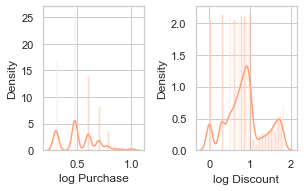

In [189]:
plt.figure(figsize=(15,5))
for i in range(0,len(transform_log)):
    plt.subplot(2,7,i+1)
    sns.distplot(df_transformasi[transform_log[i]],color='lightsalmon')
    plt.tight_layout()

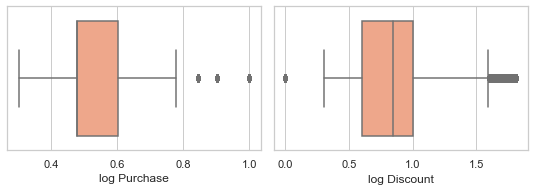

In [190]:
plt.figure(figsize=(15,5))
for i in range(0,len(transform_log)):
    plt.subplot(2, 4, i+1)
    sns.boxplot(df_transformasi[transform_log[i]],color='lightsalmon')
    plt.tight_layout()

In [191]:
#One Hot Encoding
FEwarehouse_no_outlier = pd.get_dummies(df_transformasi['Warehouse'], prefix = 'Warehouse')
FEshipment_no_outlier = pd.get_dummies(df_transformasi['Shipment'], prefix = 'Shipment')
FEGender_no_outlier = pd.get_dummies(df_transformasi['Gender'], prefix = 'Gender')

#Ordinal Encoding
Importance_ordinal_no_outlier = pd.Categorical(df_transformasi['Importance'], categories = ['low', 'medium', 'high'], ordered = True)
labels, unique = pd.factorize(Importance_ordinal_no_outlier, sort = True)

#Concat One Hot Encoding
df_transformasi = pd.concat([df_transformasi, FEwarehouse_no_outlier], axis = 1)
df_transformasi = pd.concat([df_transformasi, FEshipment_no_outlier], axis = 1)
df_transformasi = pd.concat([df_transformasi, FEGender_no_outlier], axis = 1)
df_transformasi['Importance'] = labels

In [192]:
#Drop Categorical Feature
df_transformasi = df_transformasi.drop(columns = ['ID', 'Warehouse', 'Shipment', 'Gender', 'Purchase', 'Discount'])
df_transformasi.head()

,Calls,Rating,Cost,Importance,Weight,Late,log Purchase,log Discount,Warehouse_A,Warehouse_B,Warehouse_C,Warehouse_D,Warehouse_F,Shipment_Flight,Shipment_Road,Shipment_Ship,Gender_F,Gender_M
0,4,2,177,0,1233,1,0.477266,1.643463,0,0,0,1,0,1,0,0,1,0
1,4,5,216,0,3088,1,0.301247,1.770859,0,0,0,0,1,1,0,0,0,1
2,2,2,183,0,3374,1,0.602169,1.681250,1,0,0,0,0,1,0,0,0,1
3,3,3,176,1,1177,1,0.602169,1.000043,0,1,0,0,0,1,0,0,0,1
4,2,2,184,1,2484,1,0.477266,1.662767,0,0,1,0,0,1,0,0,1,0


In [193]:
df_transformasi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Calls            10999 non-null  int64  
 1   Rating           10999 non-null  int64  
 2   Cost             10999 non-null  int64  
 3   Importance       10999 non-null  int64  
 4   Weight           10999 non-null  int64  
 5   Late             10999 non-null  int64  
 6   log Purchase     10999 non-null  float64
 7   log Discount     10999 non-null  float64
 8   Warehouse_A      10999 non-null  uint8  
 9   Warehouse_B      10999 non-null  uint8  
 10  Warehouse_C      10999 non-null  uint8  
 11  Warehouse_D      10999 non-null  uint8  
 12  Warehouse_F      10999 non-null  uint8  
 13  Shipment_Flight  10999 non-null  uint8  
 14  Shipment_Road    10999 non-null  uint8  
 15  Shipment_Ship    10999 non-null  uint8  
 16  Gender_F         10999 non-null  uint8  
 17  Gender_M    

In [194]:
df_transformasi.head()

,Calls,Rating,Cost,Importance,Weight,Late,log Purchase,log Discount,Warehouse_A,Warehouse_B,Warehouse_C,Warehouse_D,Warehouse_F,Shipment_Flight,Shipment_Road,Shipment_Ship,Gender_F,Gender_M
0,4,2,177,0,1233,1,0.477266,1.643463,0,0,0,1,0,1,0,0,1,0
1,4,5,216,0,3088,1,0.301247,1.770859,0,0,0,0,1,1,0,0,0,1
2,2,2,183,0,3374,1,0.602169,1.681250,1,0,0,0,0,1,0,0,0,1
3,3,3,176,1,1177,1,0.602169,1.000043,0,1,0,0,0,1,0,0,0,1
4,2,2,184,1,2484,1,0.477266,1.662767,0,0,1,0,0,1,0,0,1,0


# Modeling

In [195]:
#Import Metrics Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve, average_precision_score

#Model Evaluation function
def model_evaluation(model, pred, xtrain, ytrain, xtest, ytest):
    print('Accuracy : %.3f' % accuracy_score(ytest, pred))
    print('Precision : %.3f' % precision_score(ytest, pred))
    print('Recall : %.3f' % recall_score(ytest, pred))
    print('F-1Score : %.3f' % f1_score(ytest, pred))
    
    fpr, tpr, thresholds = roc_curve(ytest, pred, pos_label=1) 
    print('ROC AUC : %.3f' % auc(fpr, tpr))
    
    # Average precision score
    average_precision = average_precision_score(ytest, pred)
    print('AP : %.3f'% average_precision)

In [196]:
#Feature Importance Function
def feature_importance(model, x):
    feat_importances = pd.Series(model.best_estimator_.feature_importances_, index = x.columns)
    ax = feat_importances.nlargest(25).plot(kind = 'barh', figsize = (10, 8))
    ax.invert_yaxis()

#Best Hyperparameter Function
def best_hyperparameter(model, hyperparameters):
    for key, value in hyperparameters.items() :
        print('Best '+key+':', model.get_params()[key])

## Model Logistic Regression (Best Model) <br> dataset : df_project

In [197]:
df_project.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9996 entries, 0 to 10998
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Calls            9996 non-null   float64
 1   Rating           9996 non-null   float64
 2   Cost             9996 non-null   float64
 3   Purchase         9996 non-null   float64
 4   Importance       9996 non-null   float64
 5   Discount         9996 non-null   float64
 6   Weight           9996 non-null   float64
 7   Late             9996 non-null   float64
 8   Warehouse_A      9996 non-null   float64
 9   Warehouse_B      9996 non-null   float64
 10  Warehouse_C      9996 non-null   float64
 11  Warehouse_D      9996 non-null   float64
 12  Warehouse_F      9996 non-null   float64
 13  Shipment_Flight  9996 non-null   float64
 14  Shipment_Road    9996 non-null   float64
 15  Shipment_Ship    9996 non-null   float64
 16  Gender_F         9996 non-null   float64
 17  Gender_M     

In [198]:
#Splitting Feature & Target
xlr4 = df_project.drop(columns = ['Late']) #feature
ylr4 = df_project['Late'] #target

In [199]:
#Splitting data Train & data Test
from sklearn.model_selection import train_test_split
xlrtrain4, xlrtest4, ylrtrain4, ylrtest4 = train_test_split(xlr4, ylr4, test_size = 0.3, random_state = 33)

In [200]:
from sklearn.linear_model import LogisticRegression
modelLR4 = LogisticRegression(random_state=33)
modelLR4.fit(xlrtrain4, ylrtrain4)

LogisticRegression(random_state=33)

In [201]:
y_pred_trainLR4 = modelLR4.predict(xlrtrain4)
y_pred_trainLR4

array([0., 1., 1., ..., 0., 1., 1.])

In [202]:
y_predLR4 = modelLR4.predict(xlrtest4)
y_predLR4

array([0., 1., 1., ..., 1., 0., 1.])

In [203]:
modelLR4.predict_proba(xlrtest4)

array([[0.73636491, 0.26363509],
       [0.06400512, 0.93599488],
       [0.39181156, 0.60818844],
       ...,
       [0.07131088, 0.92868912],
       [0.61616682, 0.38383318],
       [0.4189624 , 0.5810376 ]])

In [204]:
model_evaluation(modelLR4, y_predLR4, xlrtrain4, ylrtrain4, xlrtest4, ylrtest4)

Accuracy : 0.640
Precision : 0.694
Recall : 0.726
F-1Score : 0.710
ROC AUC : 0.617
AP : 0.670


In [205]:
print('AP test score : ',average_precision_score(ylrtest4, y_predLR4))
print('AP train score : ',average_precision_score(ylrtrain4, y_pred_trainLR4))

AP test score :  0.6697762992800597
AP train score :  0.6653809655739695


<AxesSubplot:>

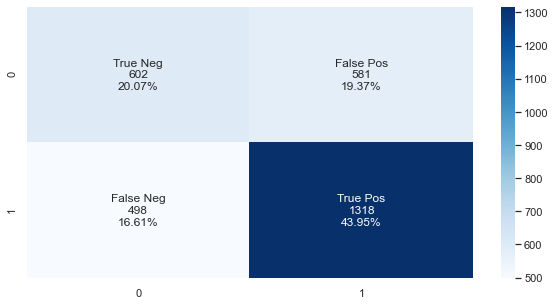

In [206]:
from sklearn.metrics import classification_report, confusion_matrix
cf_matrixa = confusion_matrix(ylrtest4, y_predLR4)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrixa.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrixa.flatten()/np.sum(cf_matrixa)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrixa, annot=labels, fmt='', cmap='Blues')

AP : 0.670


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.67')

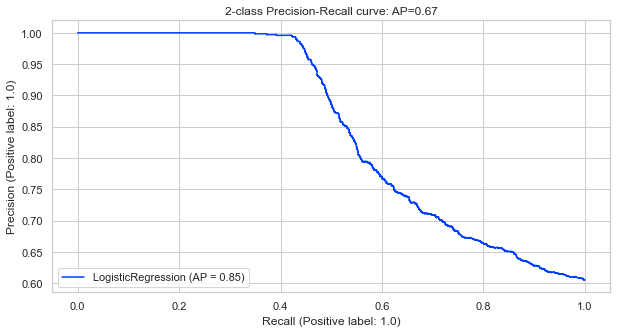

In [207]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

average_precision = average_precision_score(ylrtest4, y_predLR4)
print('AP : %.3f'% average_precision)

disp = plot_precision_recall_curve(modelLR4, xlrtest4, ylrtest4)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

In [208]:
print('train Accuracy : ',modelLR4.score(xlrtrain4, ylrtrain4))
print('test Accuracy : ',modelLR4.score(xlrtest4, ylrtest4))

train Accuracy :  0.640988995283693
test Accuracy :  0.640213404468156


In [277]:
print(modelLR4.intercept_)

[1.23464873]


In [299]:
modelLR4.coef_

array([[-0.71546752,  0.09661052, -0.31429438, -2.20297555,  0.1440757 ,
         8.03198014, -2.40729906, -0.0680354 ,  0.02322063,  0.03060397,
         0.05114368, -0.0352052 ,  0.01004352, -0.03501893,  0.02670308,
        -0.04108585,  0.04281352]])

In [300]:
modelLR4_coef=[-0.71546752,  0.09661052, -0.31429438, -2.20297555,  0.1440757 ,
         8.03198014, -2.40729906, -0.0680354 ,  0.02322063,  0.03060397,
         0.05114368, -0.0352052 ,  0.01004352, -0.03501893,  0.02670308,
        -0.04108585,  0.04281352]

In [301]:
features_coef=['Calls', 'Rating', 'Cost', 'Purchase', 'Importance', 'Discount','Weight','Warehouse_A', 'Warehouse_B', 'Warehouse_C','Warehouse_D', 'Warehouse_F', 'Shipment_Flight', 'Shipment_Road','Shipment_Ship', 'Gender_F', 'Gender_M']

In [229]:
modelLR4_coef

array([[-0.71546752,  0.09661052, -0.31429438, -2.20297555,  0.1440757 ,
         8.03198014, -2.40729906, -0.0680354 ,  0.02322063,  0.03060397,
         0.05114368, -0.0352052 ,  0.01004352, -0.03501893,  0.02670308,
        -0.04108585,  0.04281352]])

In [303]:
koef2={'Feature':features_coef,
     'Coefficient':modelLR4_coef }
koef_table=pd.DataFrame.from_dict(koef2).sort_values(by=['Coefficient'],ascending=False).reset_index(drop=True)
koef_table

,Feature,Coefficient
0,Discount,8.031980
1,Importance,0.144076
2,Rating,0.096611
3,Warehouse_D,0.051144
4,Gender_M,0.042814
5,Warehouse_C,0.030604
6,Shipment_Ship,0.026703
7,Warehouse_B,0.023221
8,Shipment_Flight,0.010044
9,Shipment_Road,-0.035019


## Model XGBoost <br> dataset : dflimit

In [128]:
#Splitting Feature & Target
xl4 = dflimit.drop(columns = ['Late'])
yl4 = dflimit['Late']

In [129]:
from sklearn.model_selection import train_test_split
#Splitting data Train & data Test
xltrain4, xltest4, yltrain4, yltest4 = train_test_split(xl4, yl4, test_size = 0.3, random_state = 3)

In [130]:
#Import XGBoost
from xgboost import XGBClassifier, XGBRegressor

#Evaluation Metrics
XGl4 = XGBClassifier(random_state = 3)
XGl4.fit(xltrain4, yltrain4)
predictionl4 = XGl4.predict(xltest4)
model_evaluation(XGl4, predictionl4, xltrain4, yltrain4, xltest4, yltest4)

[20:10:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy : 0.664
Precision : 0.729
Recall : 0.681
F-1Score : 0.705
ROC AUC : 0.660
AP : 0.684


In [131]:
predictionl4_train = XGl4.predict(xltrain4)
predictionl4_train

array([0., 1., 1., ..., 1., 1., 1.])

In [132]:
print('AP train: ',average_precision_score(yltrain4, predictionl4_train))
print('AP test: ',average_precision_score(yltest4, predictionl4))

AP train:  0.9305343344382166
AP test:  0.6841662966257959


In [133]:
print('train Accuracy : ',XGl4.score(xltrain4, yltrain4))
print('test Accuracy : ',XGl4.score(xltest4, yltest4))

train Accuracy :  0.9238862189894792
test Accuracy :  0.6639393939393939


## Model AdaBoost <br> dataset : dflimit

In [134]:
#Splitting Feature & Target
xl5 = dflimit.drop(columns = ['Late'])
yl5 = dflimit['Late']

In [135]:
from sklearn.model_selection import train_test_split
#Splitting data Train & data Test
xltrain5, xltest5, yltrain5, yltest5 = train_test_split(xl5, yl5, test_size = 0.3, random_state = 3)

In [136]:
#Import AdaBoost
from sklearn.ensemble import AdaBoostClassifier

#Evaluation Metrics
ABl5 = AdaBoostClassifier(random_state = 3)
ABl5.fit(xltrain5, yltrain5)
predictionl5 = ABl5.predict(xltest5)
model_evaluation(ABl5, predictionl5, xltrain5, yltrain5, xltest5, yltest5)

Accuracy : 0.667
Precision : 0.783
Recall : 0.601
F-1Score : 0.680
ROC AUC : 0.682
AP : 0.705


In [137]:
predictionl5_train = ABl5.predict(xltrain5)
predictionl5_train

array([0., 0., 0., ..., 0., 1., 0.])

In [138]:
print('AP train: ',average_precision_score(yltrain5, predictionl5_train))
print('AP test: ',average_precision_score(yltest5, predictionl5))

AP train:  0.7291951734218447
AP test:  0.7050101215849885


In [139]:
print('train Accuracy : ',ABl5.score(xltrain5, yltrain5))
print('test Accuracy : ',ABl5.score(xltest5, yltest5))

train Accuracy :  0.6848941420963761
test Accuracy :  0.6672727272727272


## Model Random Forest <br> dataset : dfori

In [140]:
dfori.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Calls            10999 non-null  float64
 1   Rating           10999 non-null  float64
 2   Cost             10999 non-null  float64
 3   Purchase         10999 non-null  float64
 4   Importance       10999 non-null  float64
 5   Discount         10999 non-null  float64
 6   Weight           10999 non-null  float64
 7   Late             10999 non-null  float64
 8   Warehouse_A      10999 non-null  float64
 9   Warehouse_B      10999 non-null  float64
 10  Warehouse_C      10999 non-null  float64
 11  Warehouse_D      10999 non-null  float64
 12  Warehouse_F      10999 non-null  float64
 13  Shipment_Flight  10999 non-null  float64
 14  Shipment_Road    10999 non-null  float64
 15  Shipment_Ship    10999 non-null  float64
 16  Gender_F         10999 non-null  float64
 17  Gender_M    

In [141]:
#Splitting Feature & Target
xr1 = dfori.drop(columns = ['Late'])
yr1 = dfori['Late']

In [142]:
from sklearn.model_selection import train_test_split
#Splitting data Train & data Test
xrtrain1, xrtest1, yrtrain1, yrtest1 = train_test_split(xr1, yr1, test_size = 0.3, random_state = 10)

In [143]:
#Import RandomForest
from sklearn.ensemble import RandomForestClassifier

#Evaluation Metrics
RFr1 = RandomForestClassifier(random_state = 10)
RFr1.fit(xrtrain1, yrtrain1)
predictionr1 = RFr1.predict(xrtest1)
model_evaluation(RFr1, predictionr1, xrtrain1, yrtrain1, xrtest1, yrtest1)

Accuracy : 0.661
Precision : 0.756
Recall : 0.642
F-1Score : 0.694
ROC AUC : 0.666
AP : 0.700


In [144]:
print('train Accuracy : ', RFr1.score(xrtrain1, yrtrain1))
print('test Accuracy : ', RFr1.score(xrtest1, yrtest1))

train Accuracy :  1.0
test Accuracy :  0.6609090909090909


In [145]:
from sklearn.metrics import plot_confusion_matrix

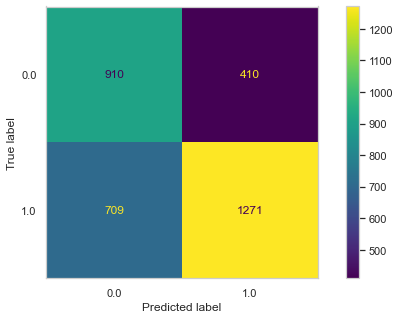

In [146]:
plot_confusion_matrix(RFr1, xrtest1, yrtest1)
plt.grid(False)
plt.show() 

### Tuning Hyperparameter Random Forest

In [147]:
from sklearn.model_selection import validation_curve

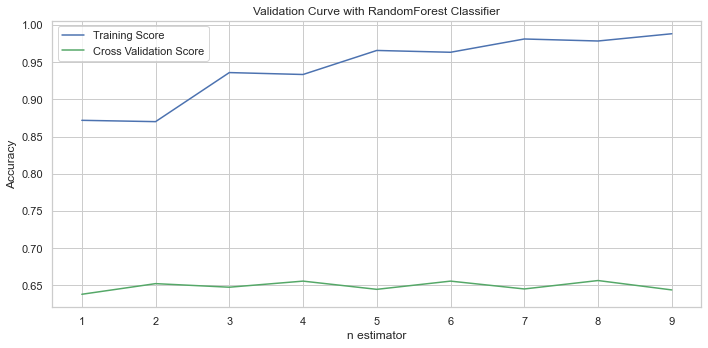

In [148]:
parameter_range = np.arange(1, 10, 1)

train_score, test_score = validation_curve(
                                RandomForestClassifier(random_state = 10),
                                X = xrtrain1, y = yrtrain1, 
                                param_name = 'n_estimators', 
                                param_range = parameter_range,
                                cv = 5,
                                scoring = 'accuracy')

# Calculating mean and standard deviation of training score
mean_train_score = np.mean(train_score, axis = 1)
std_train_score = np.std(train_score, axis = 1)
 
# Calculating mean and standard deviation of testing score
mean_test_score = np.mean(test_score, axis = 1)
std_test_score = np.std(test_score, axis = 1)
 
# Plot mean accuracy scores for training and testing scores
plt.plot(parameter_range, mean_train_score,
     label = "Training Score", color = 'b')
plt.plot(parameter_range, mean_test_score,
   label = "Cross Validation Score", color = 'g')
 
# Creating the plot
plt.title("Validation Curve with RandomForest Classifier")
plt.xlabel("n estimator")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.legend(loc = 'best')
plt.show()

In [149]:
#Import RandomForest
from sklearn.ensemble import RandomForestClassifier

#Evaluation Metrics
RFHr1 = RandomForestClassifier(random_state = 10, n_estimators = 8, max_depth = 4, min_samples_split = 5, min_samples_leaf = 2)
RFHr1.fit(xrtrain1, yrtrain1)
predictionr1 = RFHr1.predict(xrtest1)
model_evaluation(RFHr1, predictionr1, xrtrain1, yrtrain1, xrtest1, yrtest1)

Accuracy : 0.679
Precision : 0.844
Recall : 0.570
F-1Score : 0.681
ROC AUC : 0.706
AP : 0.739


In [150]:
predictionr1_train = RFHr1.predict(xrtrain1)
predictionr1_train

array([1., 0., 0., ..., 1., 0., 1.])

In [151]:
print('AP train: ',average_precision_score(yrtrain1, predictionr1_train))
print('AP train: ',average_precision_score(yrtest1, predictionr1))

AP train:  0.7414611484184332
AP train:  0.7390133774214491


In [152]:
print('train Accuracy : ', RFHr1.score(xrtrain1, yrtrain1))
print('test Accuracy : ', RFHr1.score(xrtest1, yrtest1))

train Accuracy :  0.6889206390440317
test Accuracy :  0.6787878787878788


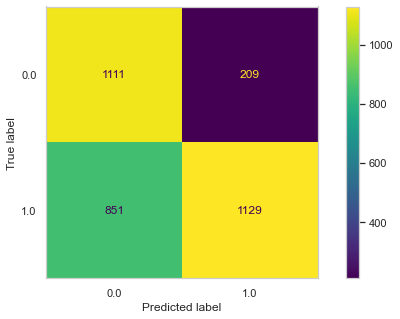

In [153]:
plot_confusion_matrix(RFHr1, xrtest1, yrtest1)
plt.grid(False)
plt.show() 

# Benefit Analysis

In [154]:
#On Time Rate Growth Calculation 
Total = df['ID'].count()
Late =  df[df['Late']==1]['ID'].count()
OnTime =  df[df['Late']==0]['ID'].count()
PredRate = 0.73
PredLate = round(Late*PredRate)
PredOnTime = Late-PredLate

print('----- Existing -----')
print('\t\t\t','count', 'percentage')
print('Delivery : \t\t', Total)
print('Late : \t\t\t', Late, ',', round(Late/Total*100,1),'%')
print('On Time : \t\t', OnTime, ',', round(OnTime/Total*100,1),'%')
print()
print('----- After Modeling -----')
print('\t\t\t','count', 'percentage')
print('Delivery : \t\t', Total)
print('Late : \t\t\t', Late, ',', round(Late/Total*100,1),'%')
print('  Predicted Late : \t', round(PredLate), ',', round(PredLate/Late*100,1),'%')
print('  Predicted On Time : \t', round(PredOnTime), ',', round(PredOnTime/Late*100,1),'%')
print('Late After Pred : \t', Late-PredLate, ',', round((Late-PredLate)/Total*100,1),'%')
print('On Time : \t\t', OnTime, ',', round(OnTime/Total*100,1),'%')
print('On Time After Pred : \t', OnTime+PredLate, ',', round((OnTime+PredLate)/Total*100,1),'%')
print('On Time Growth rate : \t', round(((OnTime+PredLate)/(OnTime)-1)*100,1), '%')

----- Existing -----
			 count percentage
Delivery : 		 10999
Late : 			 6563 , 59.7 %
On Time : 		 4436 , 40.3 %

----- After Modeling -----
			 count percentage
Delivery : 		 10999
Late : 			 6563 , 59.7 %
  Predicted Late : 	 4791 , 73.0 %
  Predicted On Time : 	 1772 , 27.0 %
Late After Pred : 	 1772 , 16.1 %
On Time : 		 4436 , 40.3 %
On Time After Pred : 	 9227 , 83.9 %
On Time Growth rate : 	 108.0 %


In [155]:
#Potential Revenue Loss Saved Calculation
TotalCost = df['Cost'].sum()
TotalDiscount = df['Discount'].sum()
TotalRevenue = TotalCost - TotalDiscount
AvgRevenue = round(TotalRevenue / Total, 2)

print('Total Cost : \t\t', '{:,}'.format(TotalCost))
print('Total Discount : \t', '{:,}'.format(TotalDiscount))
print('Total Revenue : \t', '{:,}'.format(TotalRevenue))
print('Average Revenue : \t', '{:,}'.format(AvgRevenue))
print()
print('Potential Revenue')
print('Late : \t\t\t', '{:,.2f}'.format(AvgRevenue * Late))
print('Predicted Late : \t', '{:,.2f}'.format(AvgRevenue * PredLate))
print()
print('*Nominal in Dollar $')

Total Cost : 		 2,311,955
Total Discount : 	 147,092
Total Revenue : 	 2,164,863
Average Revenue : 	 196.82

Potential Revenue
Late : 			 1,291,729.66
Predicted Late : 	 942,964.62

*Nominal in Dollar $


In [156]:
df[(df['Late']==1) & (df['Rating']==5)]

,ID,Warehouse,Shipment,Calls,Rating,Cost,Purchase,Importance,Gender,Discount,Weight,Late
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
11,12,F,Flight,4,5,232,3,medium,F,32,3253,1
12,13,D,Flight,3,5,198,3,medium,F,1,3667,1
17,18,F,Ship,5,5,227,3,medium,M,36,3952,1
18,19,D,Ship,5,5,239,3,high,M,18,2495,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10900,10901,C,Ship,5,5,196,4,medium,M,8,4604,1
10903,10904,F,Ship,3,5,241,4,low,F,9,5526,1
10910,10911,A,Ship,5,5,264,8,high,F,10,5759,1
10963,10964,F,Flight,4,5,220,10,medium,M,8,4100,1


In [157]:
#20% from late customer give 5 rating
late5percent=(1317/6563)*100
late5percent

20.06704251104678

In [158]:
#Rating Growth Calculation 
TotalRating = df['Rating'].sum()
AvgRating = round(TotalRating / Total, 2)
print('Total Rating : \t\t\t', '{:,}'.format(TotalRating))
print('Average Rating : \t\t', AvgRating)
print()
print('Predicted Late Rating : \t', '{:,}'.format(TotalRating), '+' , '{:,}'.format(PredLate-round(PredLate*0.2)), '=', '{:,}'.format(TotalRating + PredLate-round(PredLate*0.2)) )
print('Predicted Late Estimated Rating goes up by 1 (except Rating = 5)')
print()
print('Avg Rating after Prediction : \t', round(((TotalRating + PredLate-round(PredLate*0.2))/Total), 2))
print('On Time Growth rate : \t\t', round((((TotalRating + PredLate-round(PredLate*0.2))/Total)/((TotalRating)/Total)-1)*100,1), '%')

Total Rating : 			 32,893
Average Rating : 		 2.99

Predicted Late Rating : 	 32,893 + 3,833 = 36,726
Predicted Late Estimated Rating goes up by 1 (except Rating = 5)

Avg Rating after Prediction : 	 3.34
On Time Growth rate : 		 11.7 %
